# EV Charging Stations Demo: 
This algorithm finds the optimal locations for placing EV chargers using quantum computing and genetic algorithms. Based on the technical paper: https://tinyurl.com/EV-Quantum-Paper 

In [1]:
# Import some auxiliary packages. Make sure that all packages are installed
from Qcentroid_SDK import Qcentroid_SDK
import time
from IPython.display import display, clear_output
import folium

In [2]:
# Get your private endpoint and credentials from our team - info@qapitan.com
QCENTROID_PUBLIC_API = "https://api.qcentroid.xyz"
PAYLOAD_USER = {"username": "esa_test@qcentroid.xyz", "password": "123qweQWE"}


In [3]:
import json
with open("evplacementlocs.json") as f:
  PAYLOAD = json.load(f)

In [4]:
poi_lats = []
poi_longi = []
for poi in PAYLOAD['data']['points_of_interest']:
    poi_lats.append(poi['Latitudes'])
    poi_longi.append(poi['Longitudes'])

## Displaying points of interest on a map (potential EV chargers)


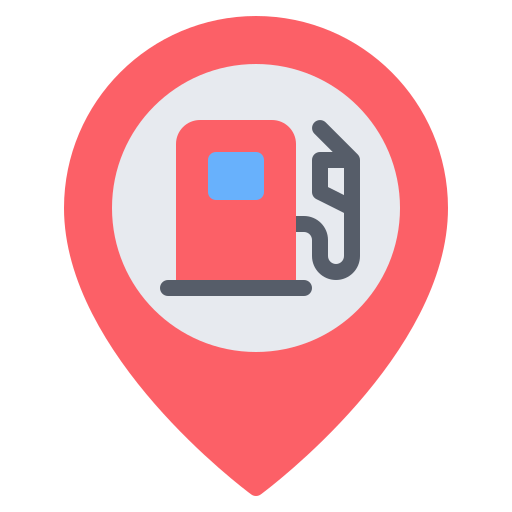
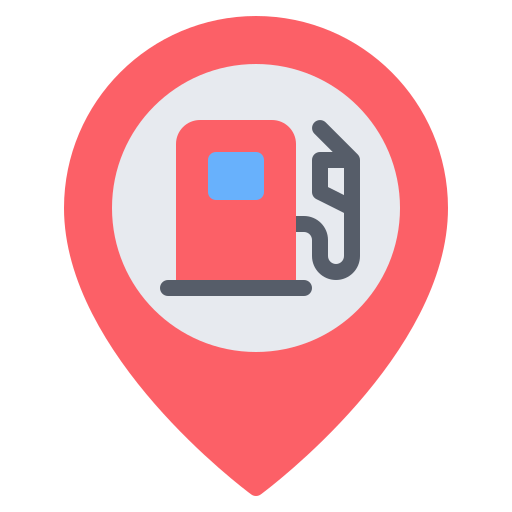
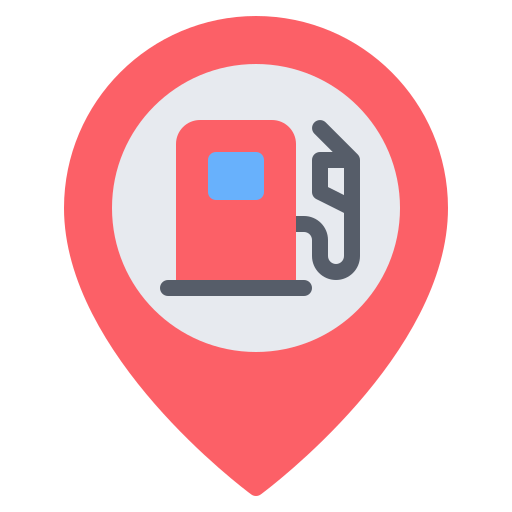
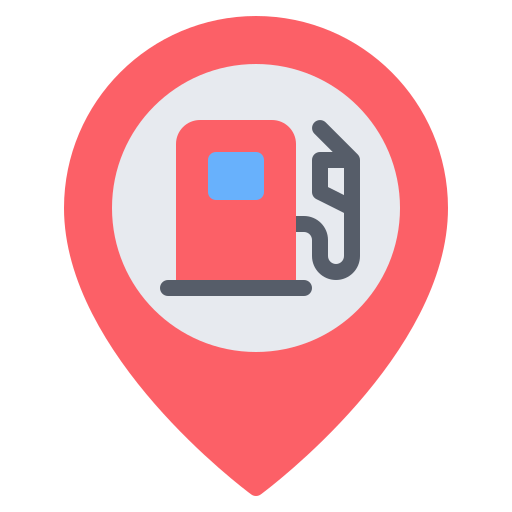
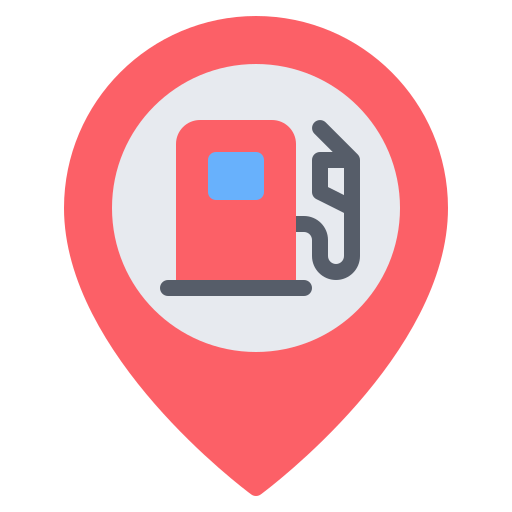
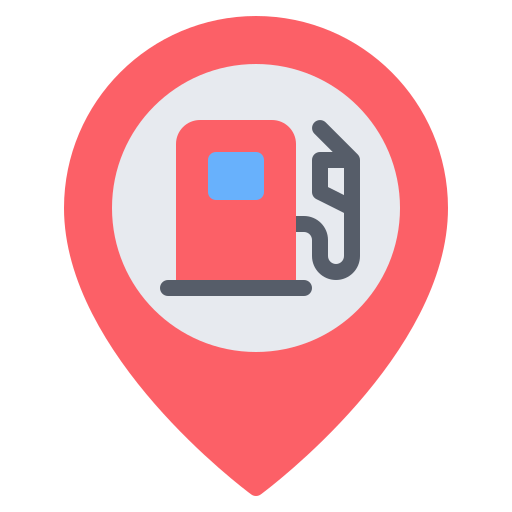
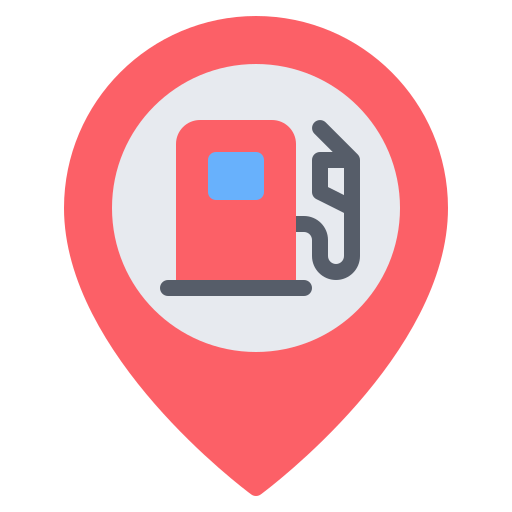
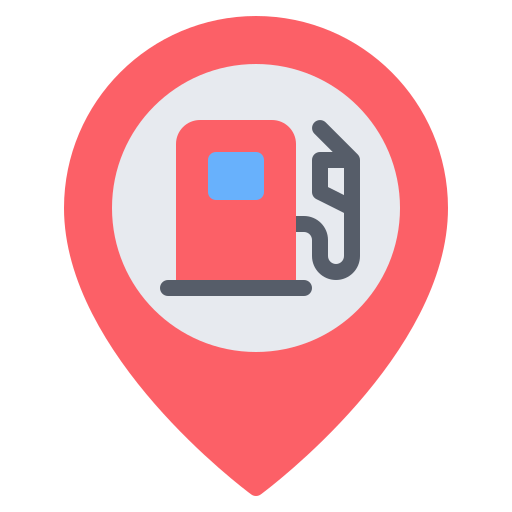
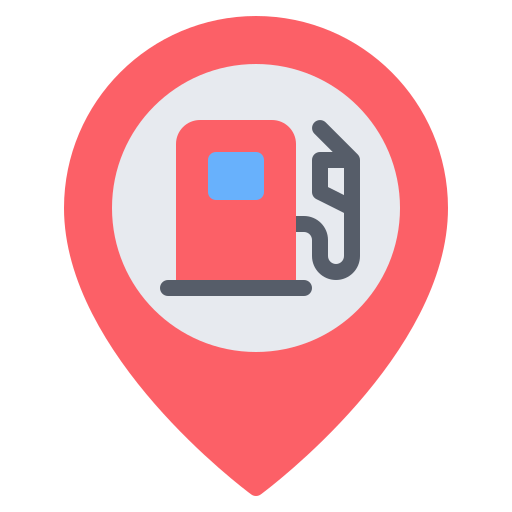
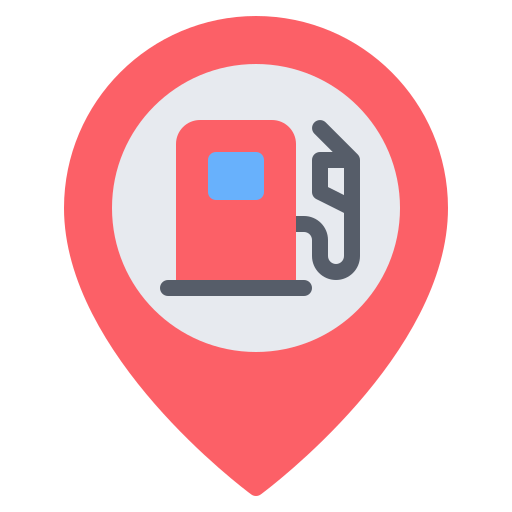
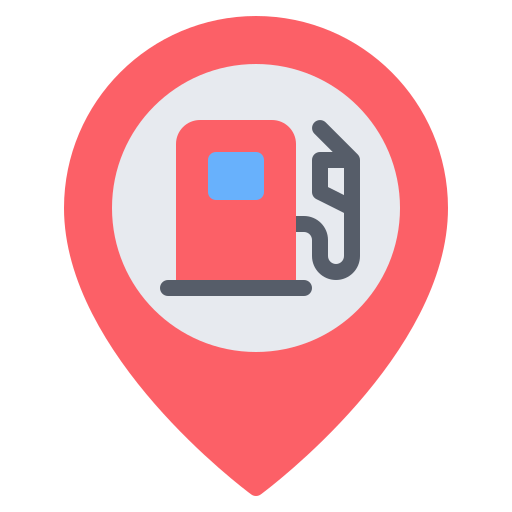
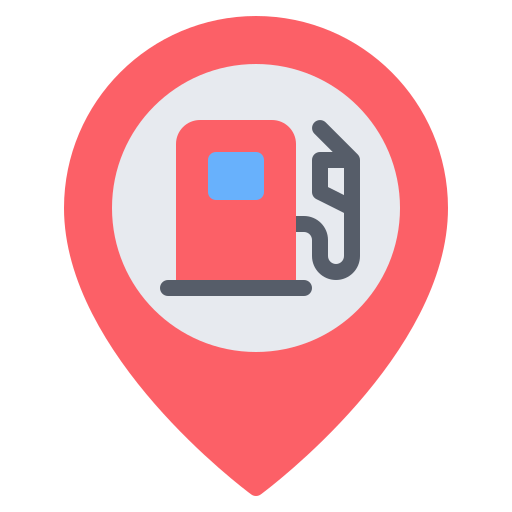
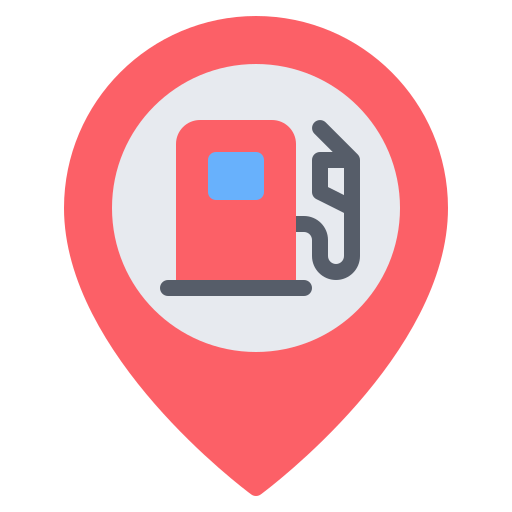
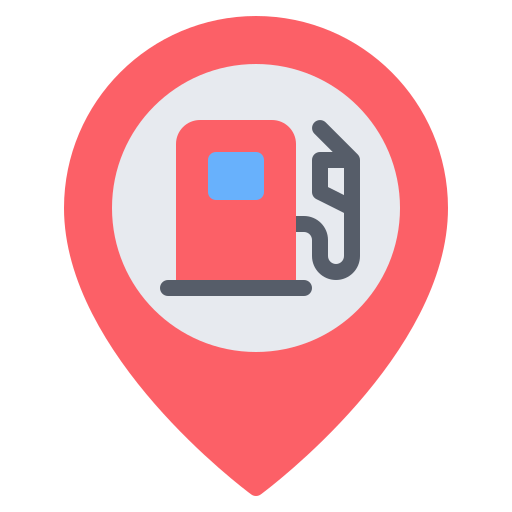
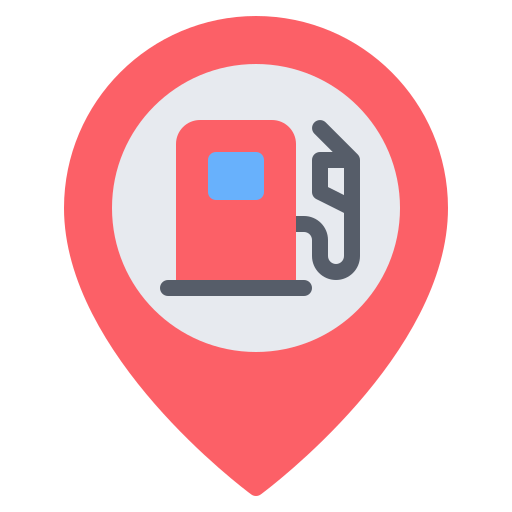
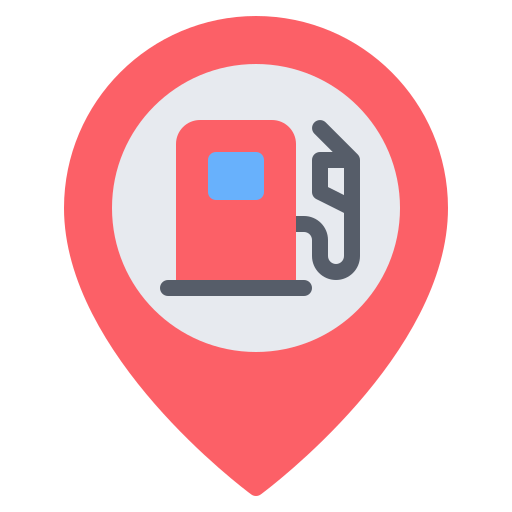
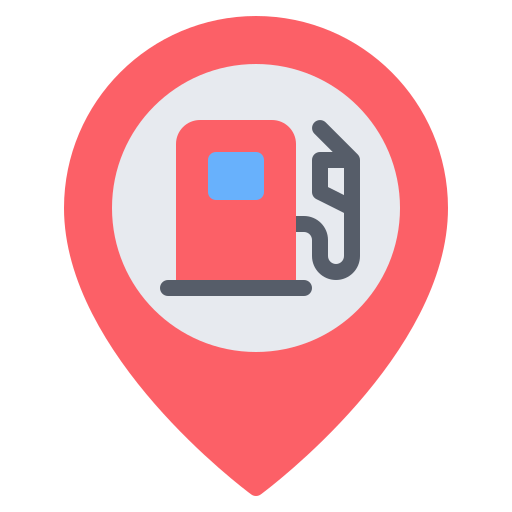
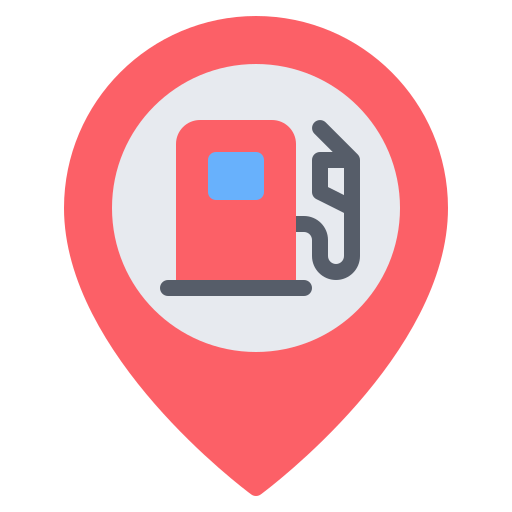
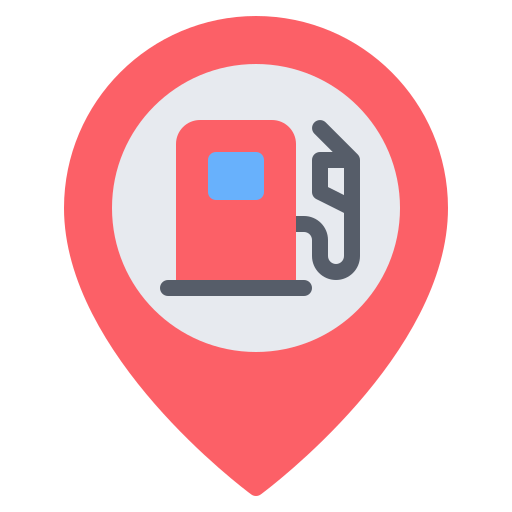
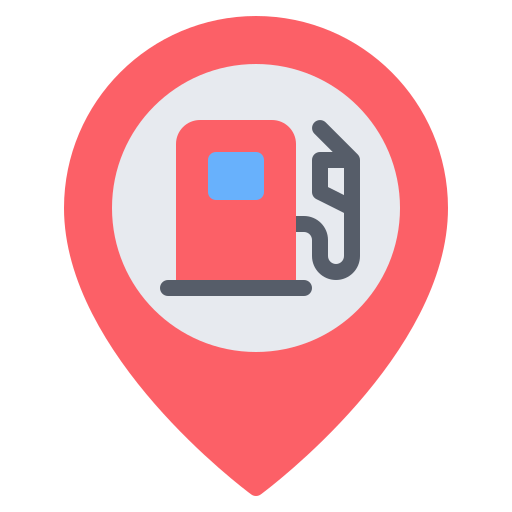
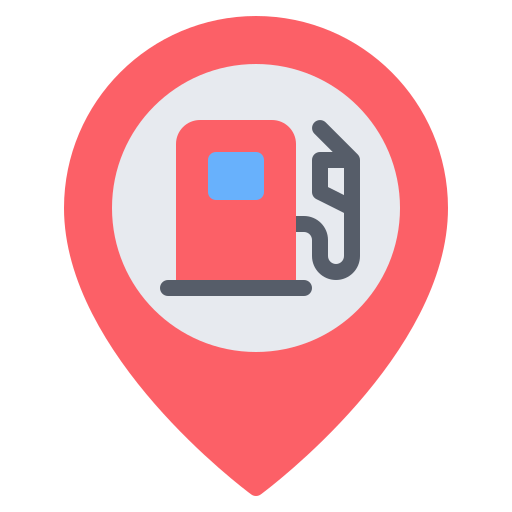
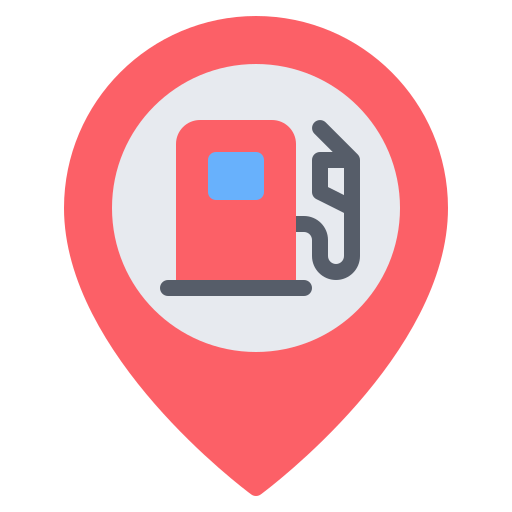
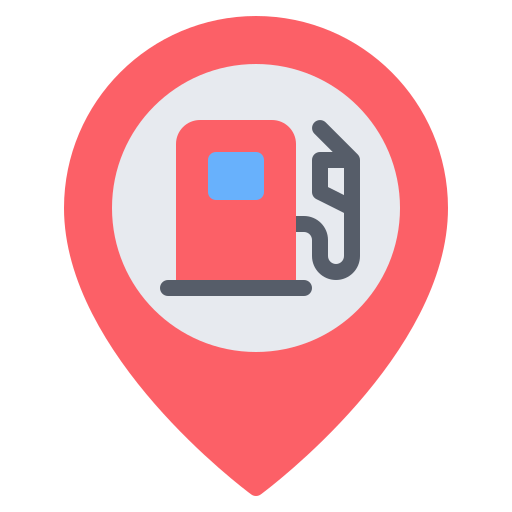
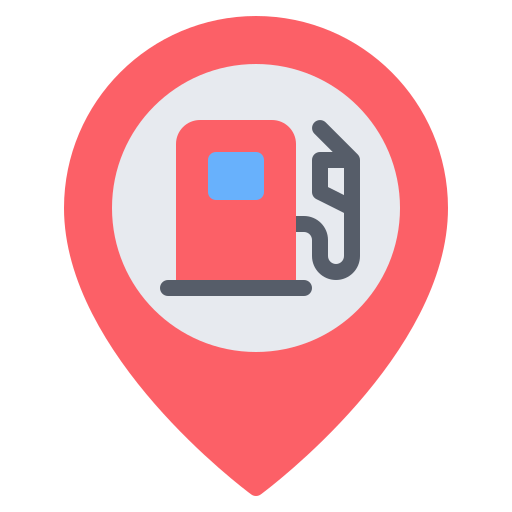
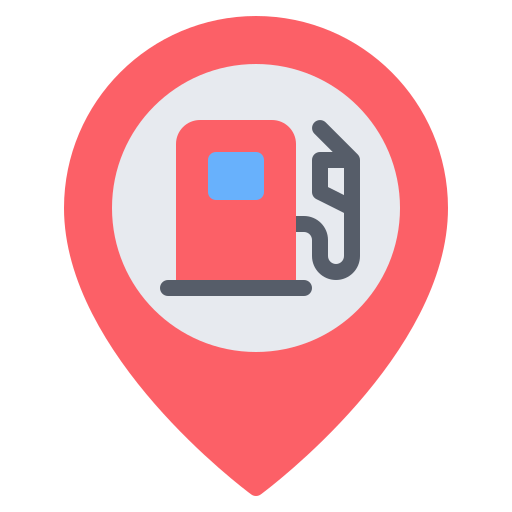
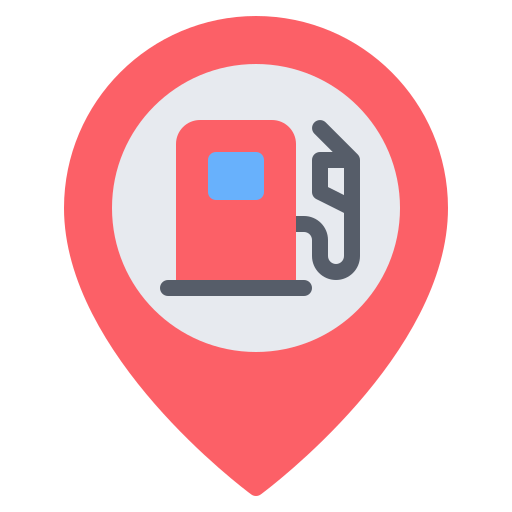
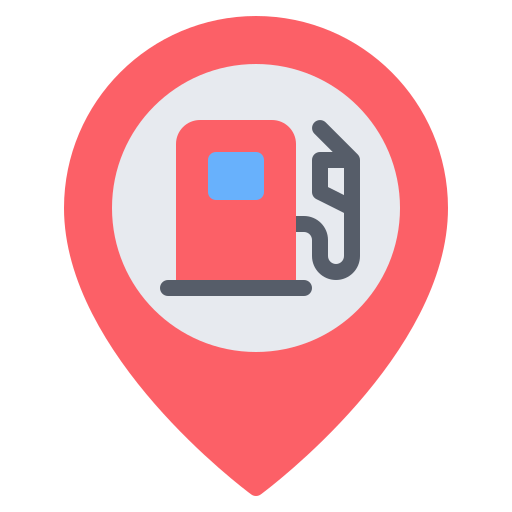
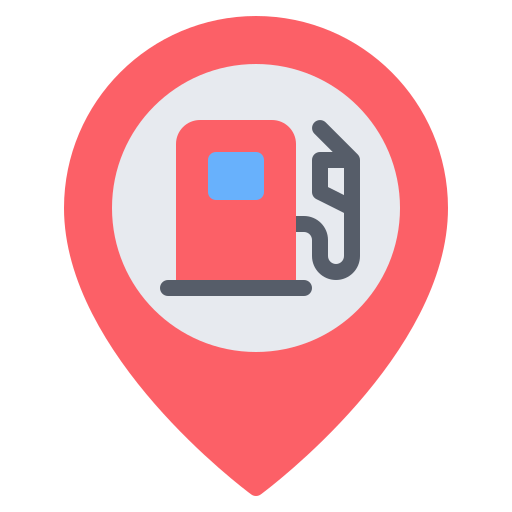
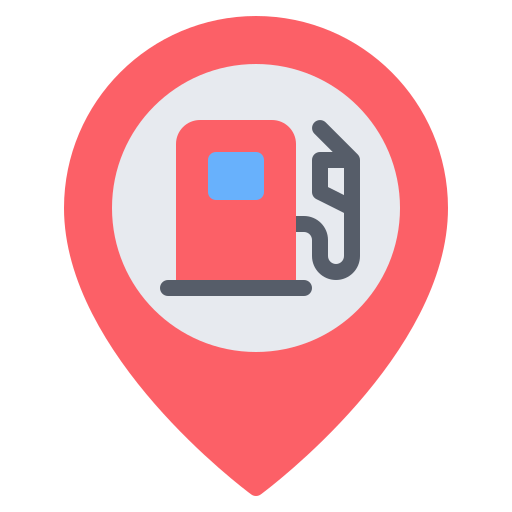
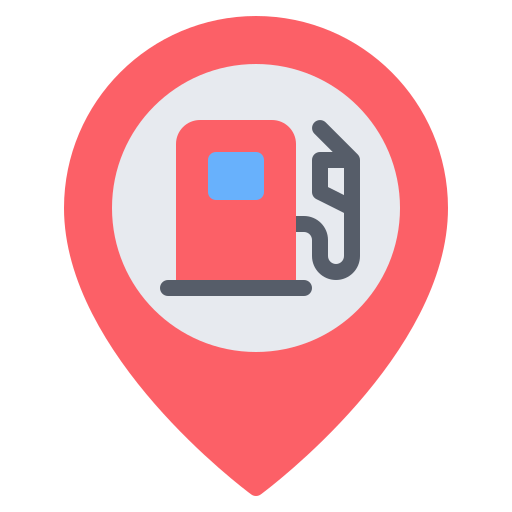
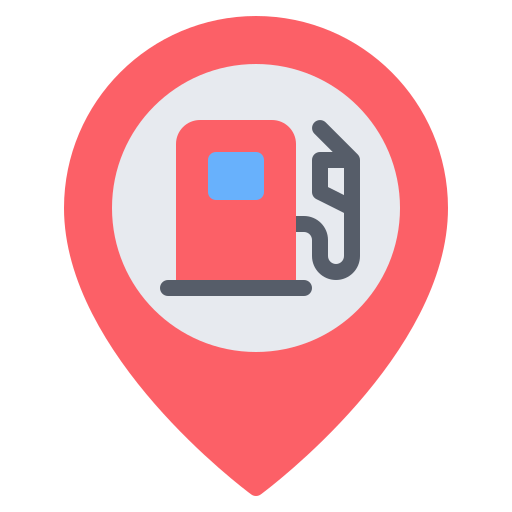
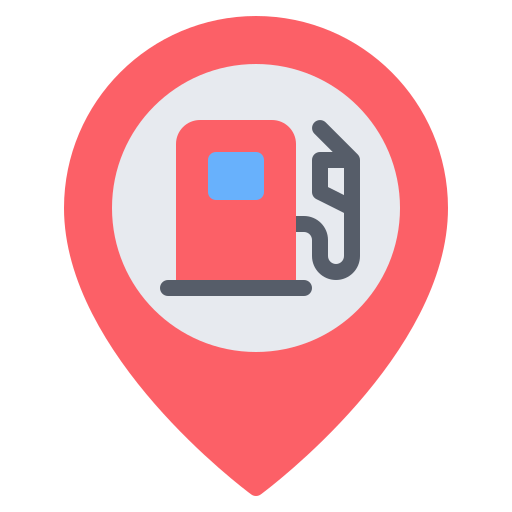
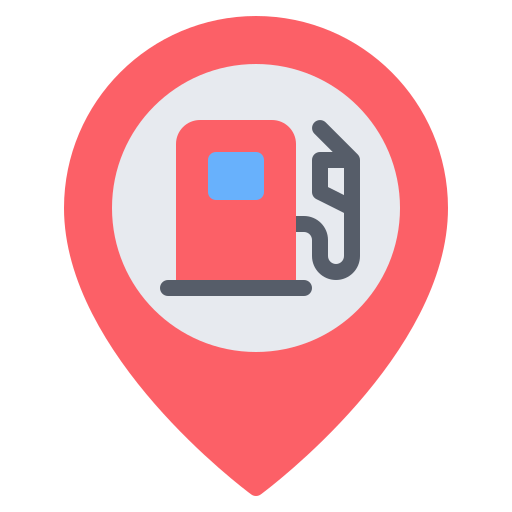
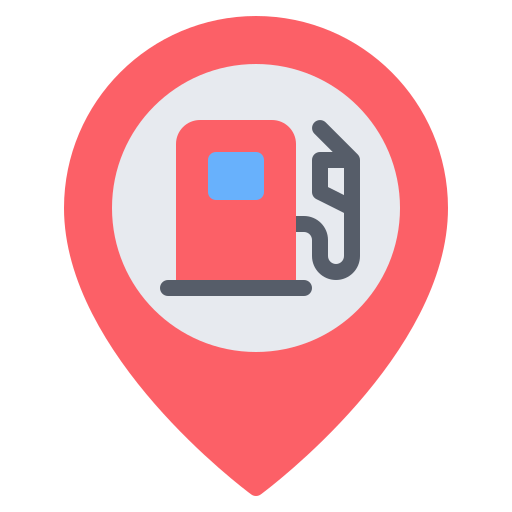
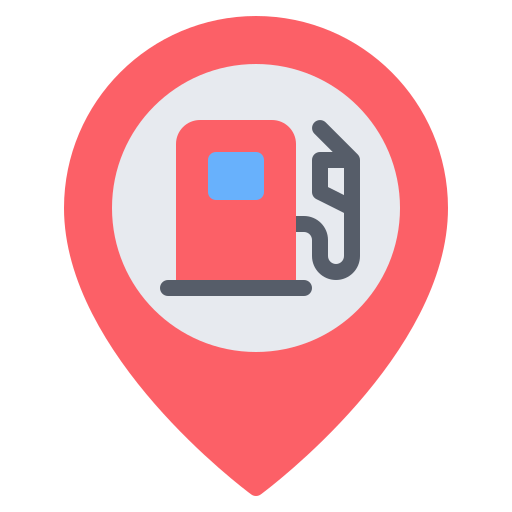
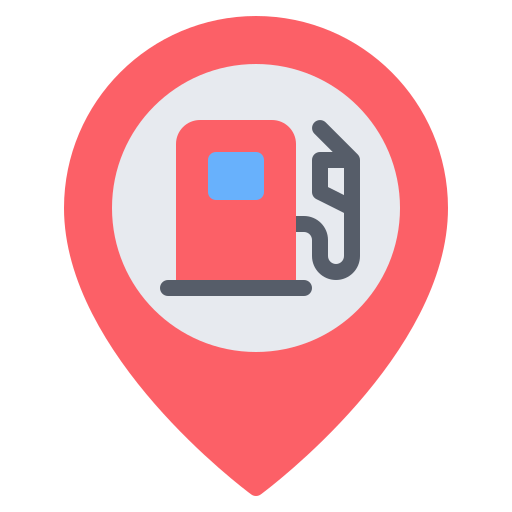
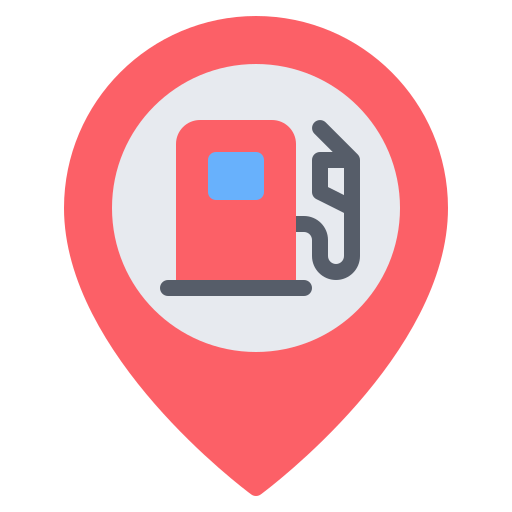
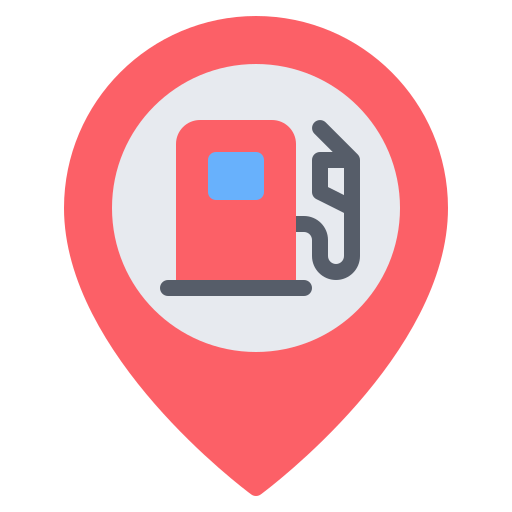
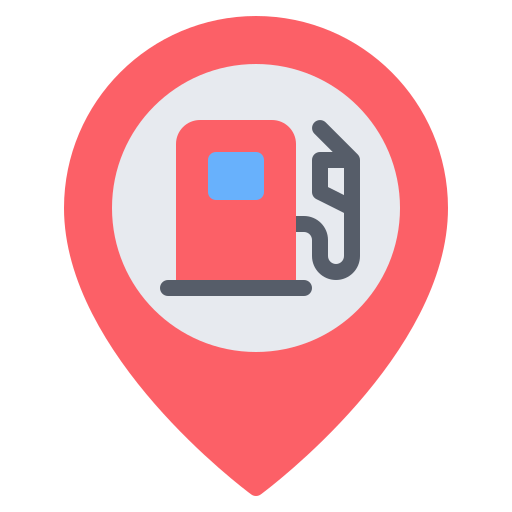
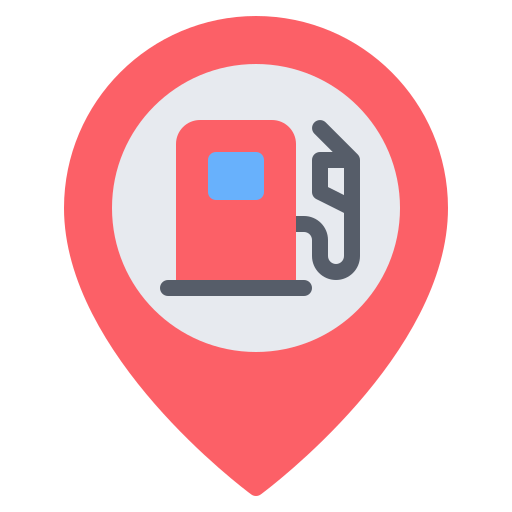
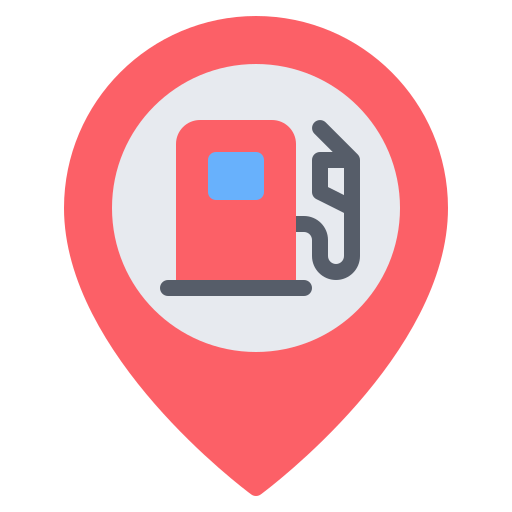
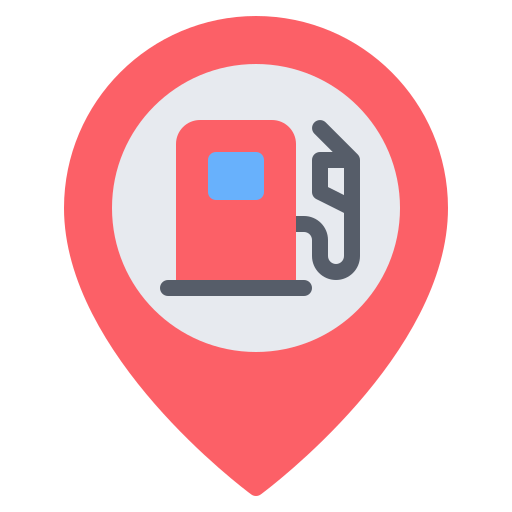
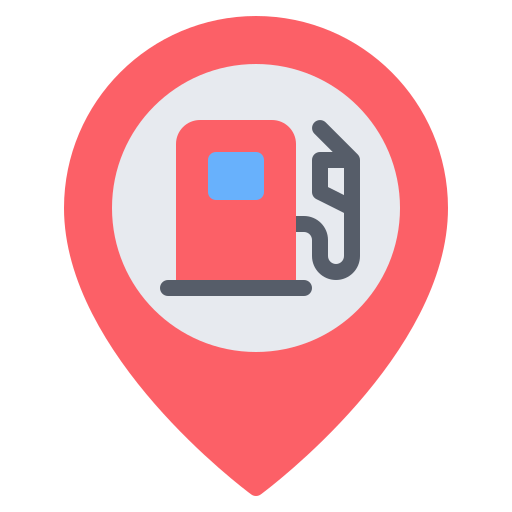
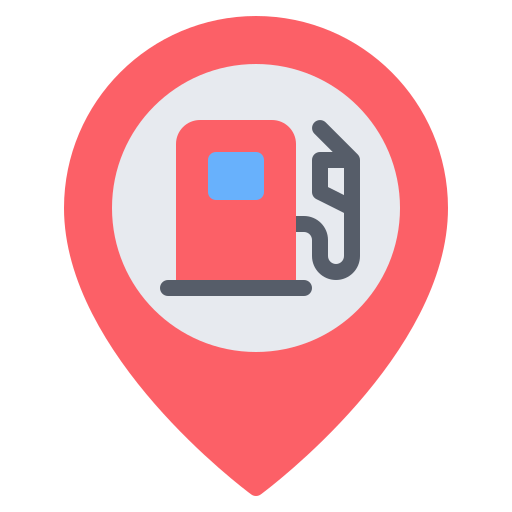
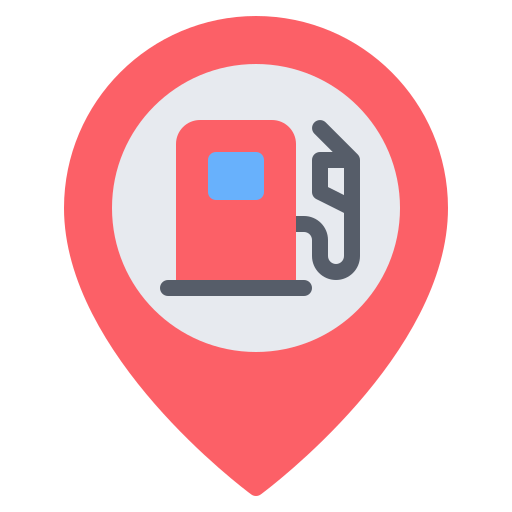
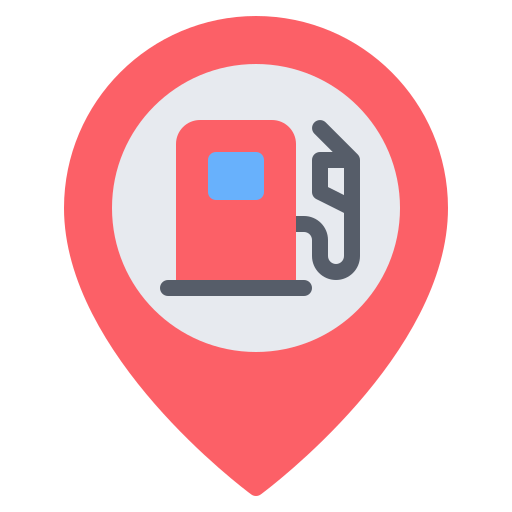
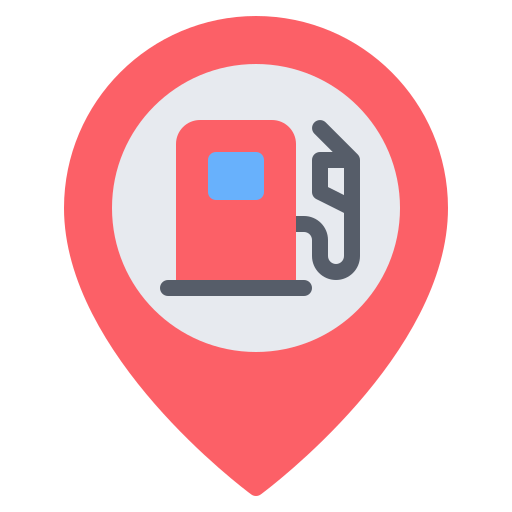
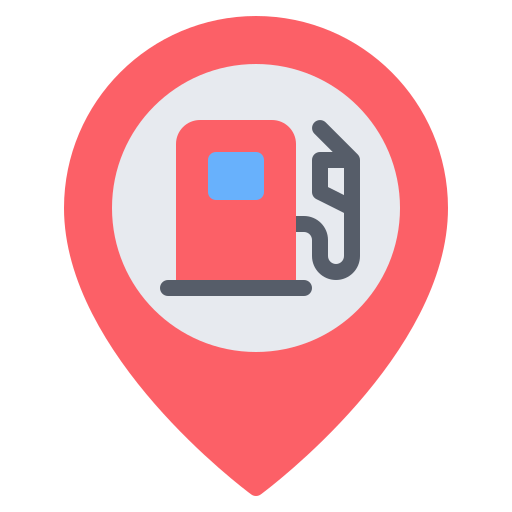
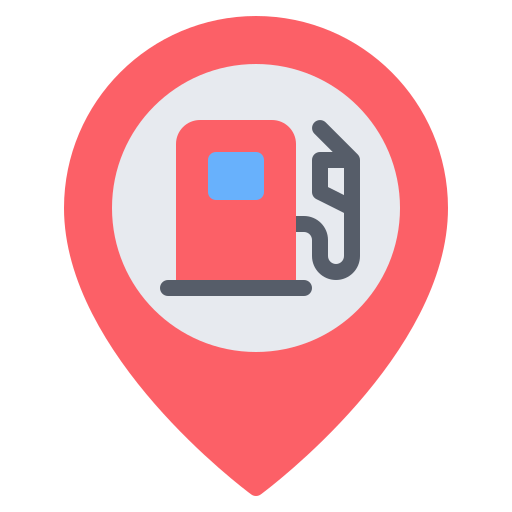
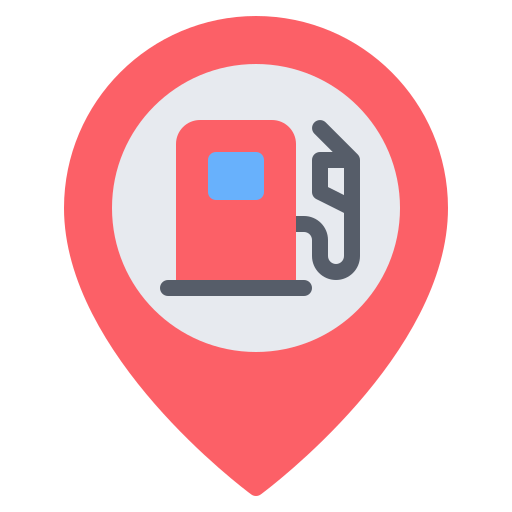
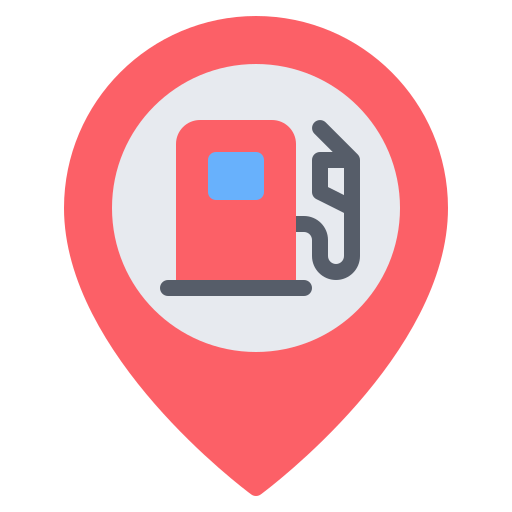
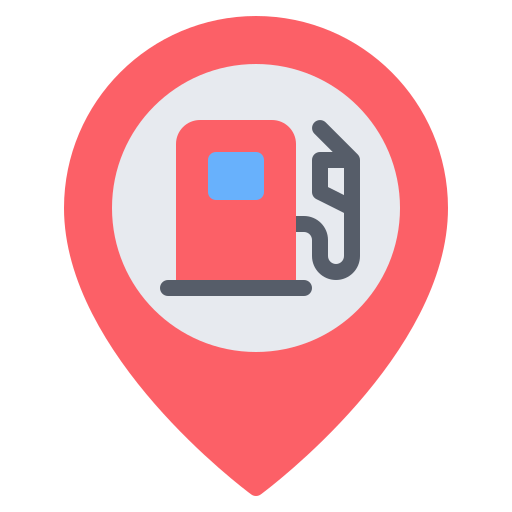
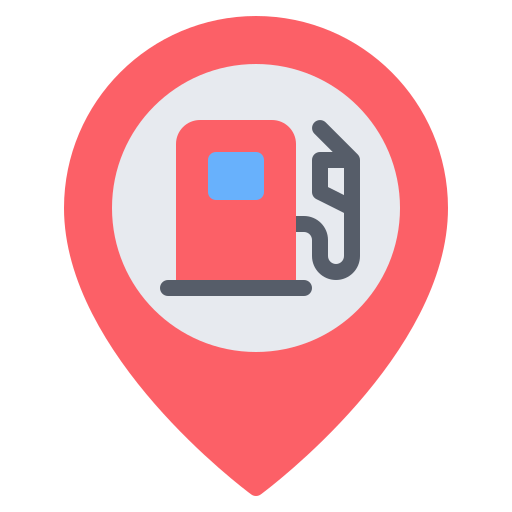
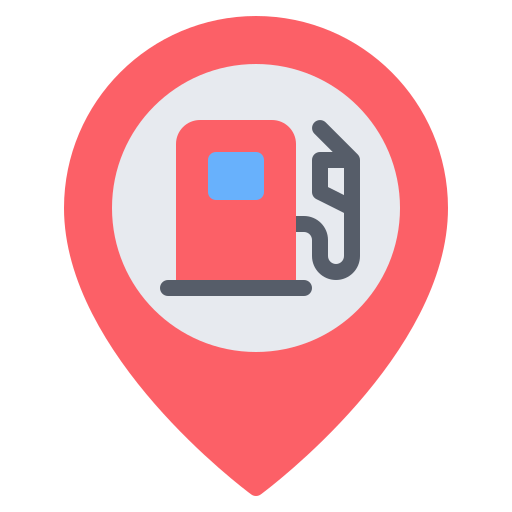
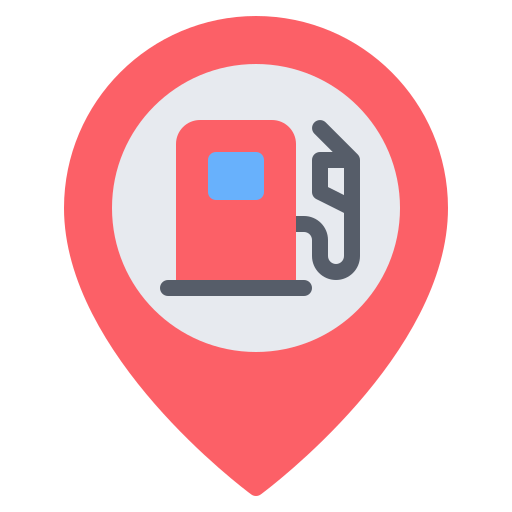
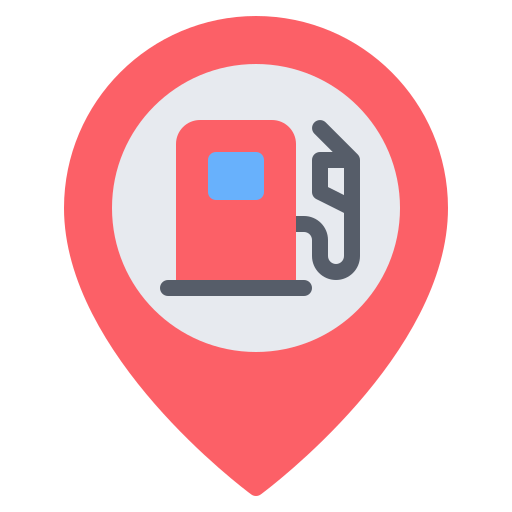
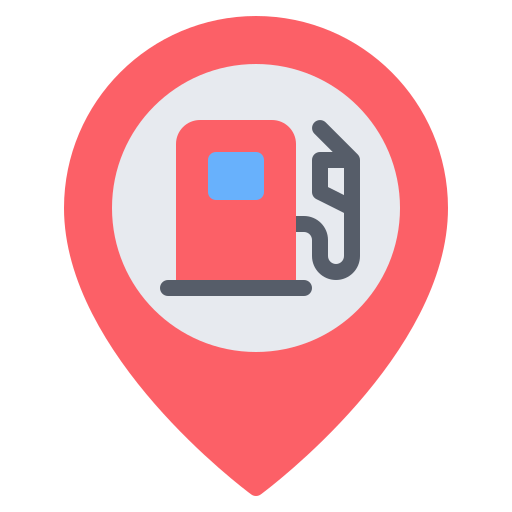
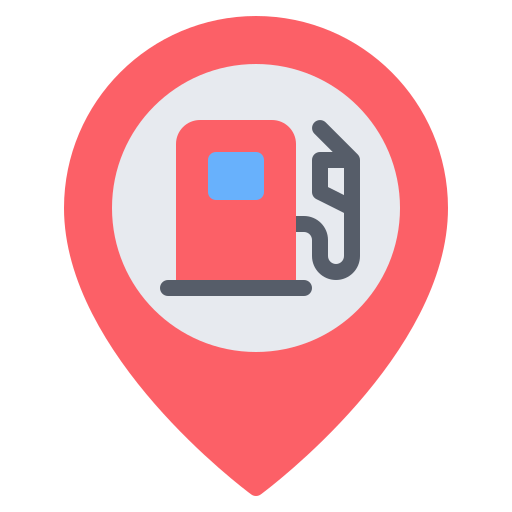
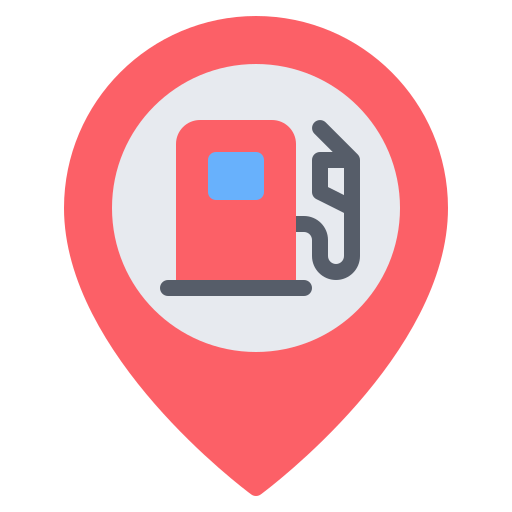
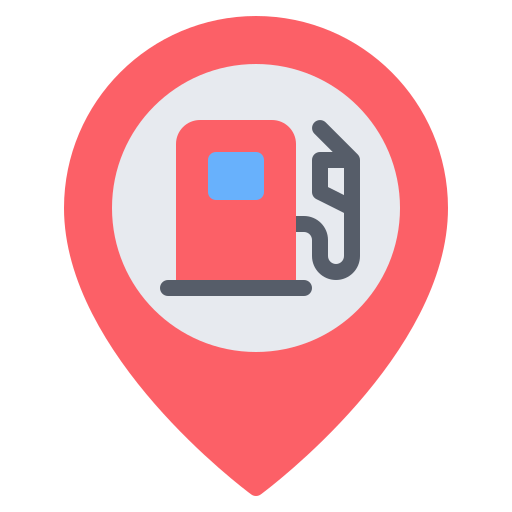
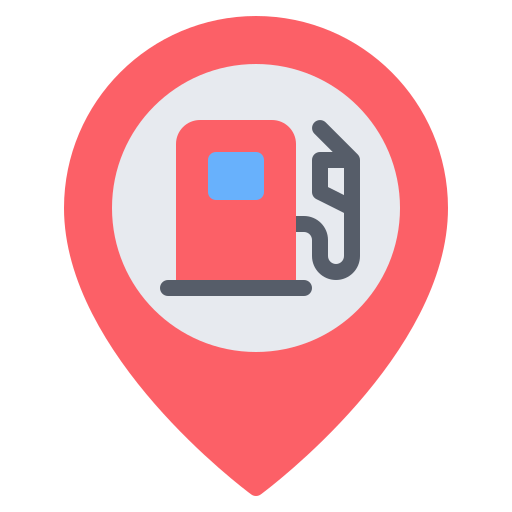
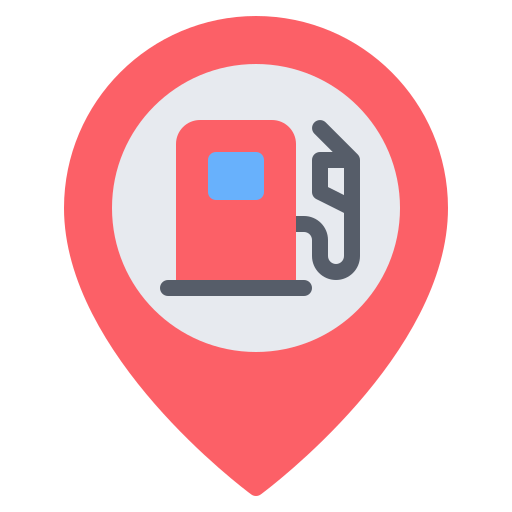
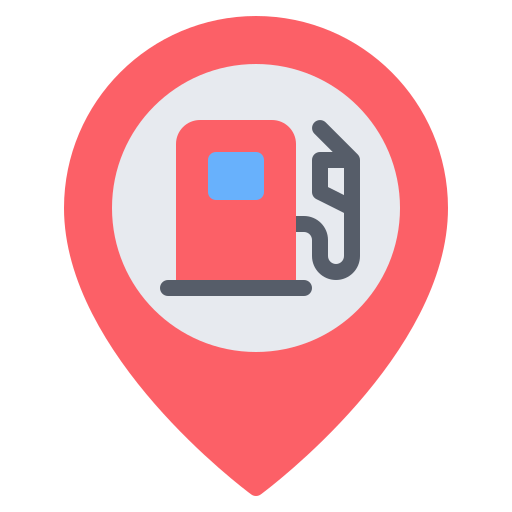
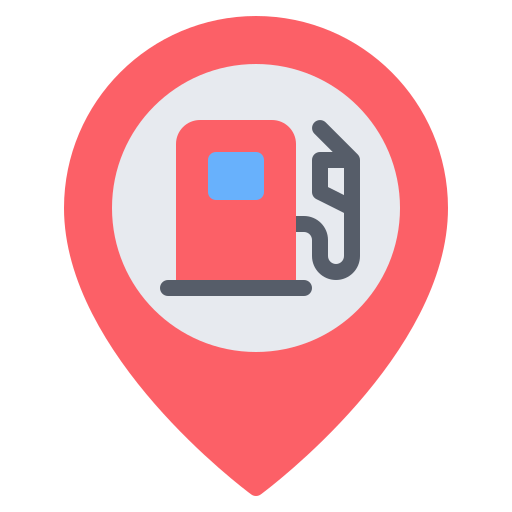
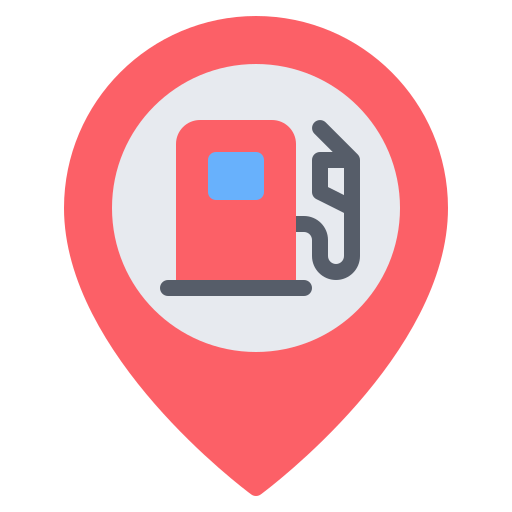
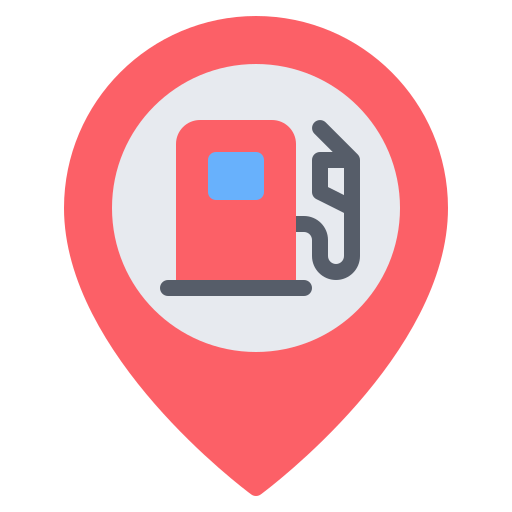
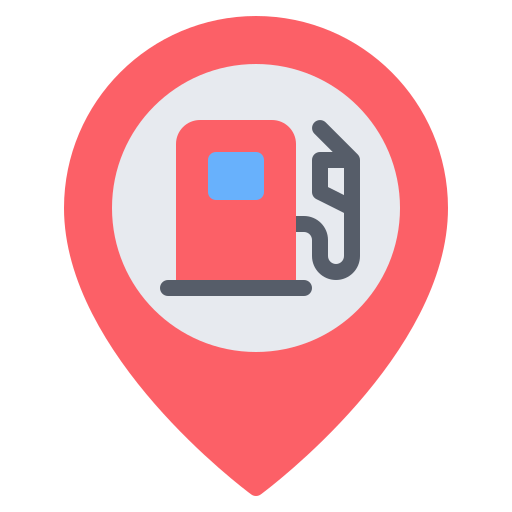
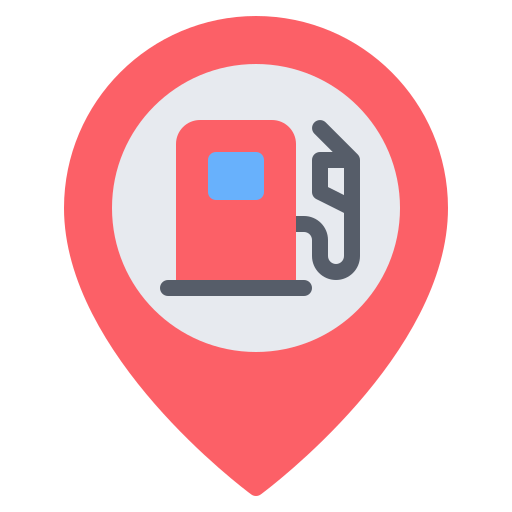
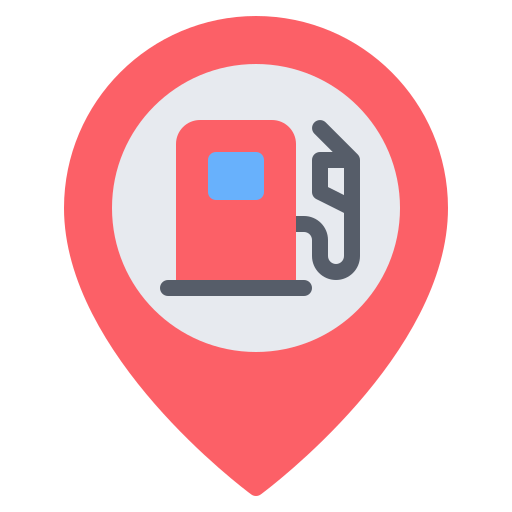
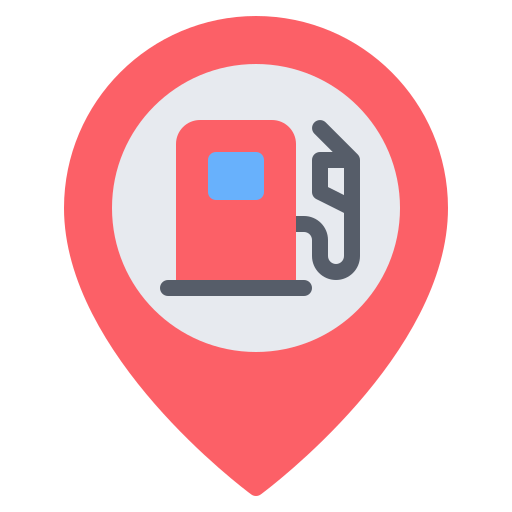
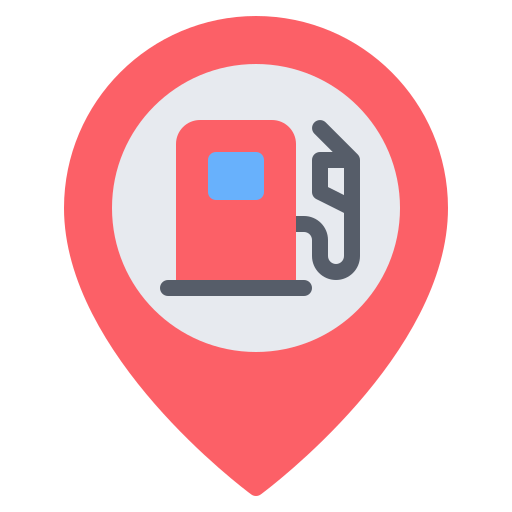
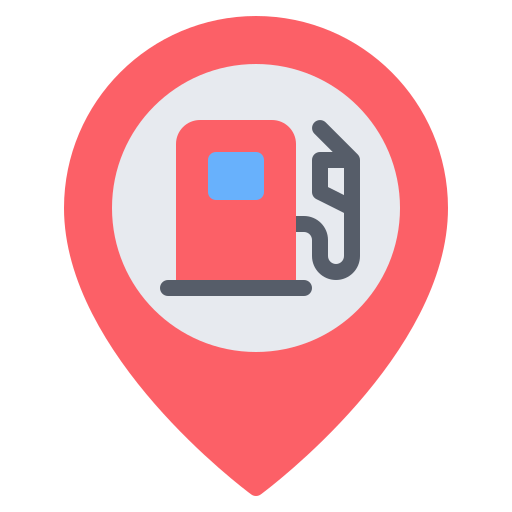
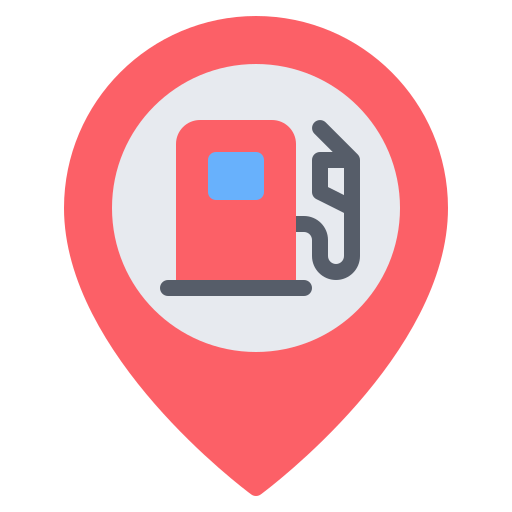
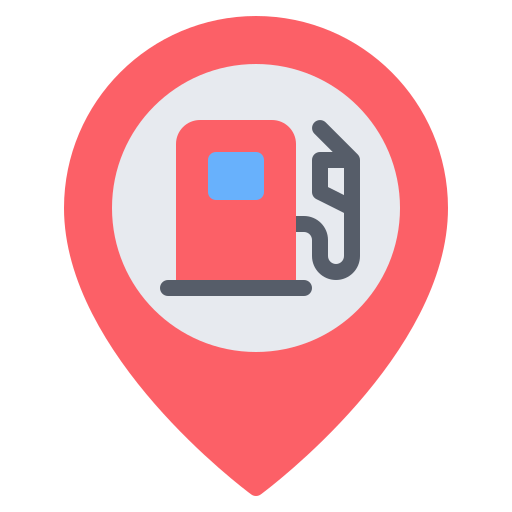
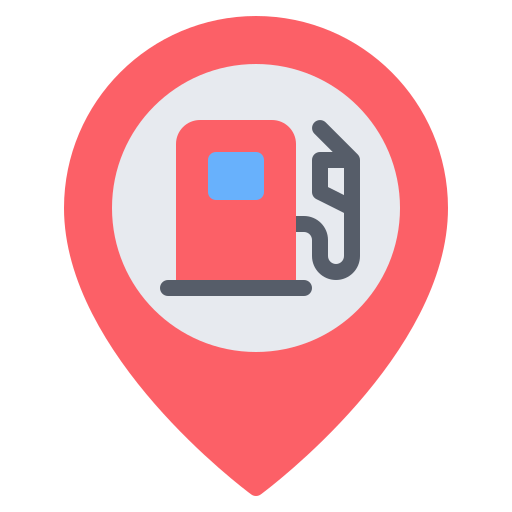
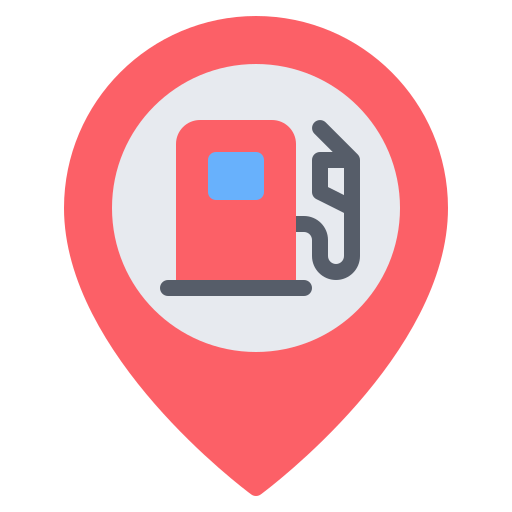
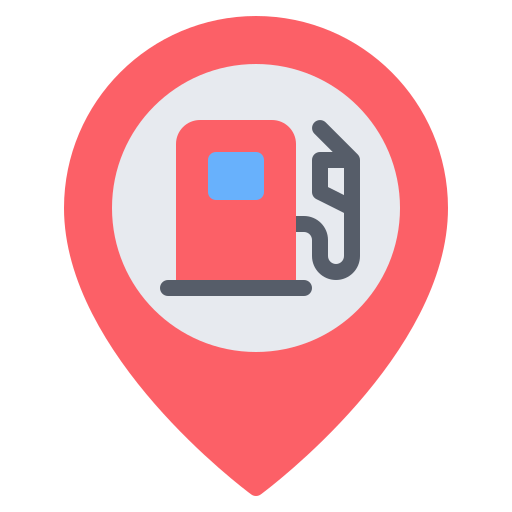
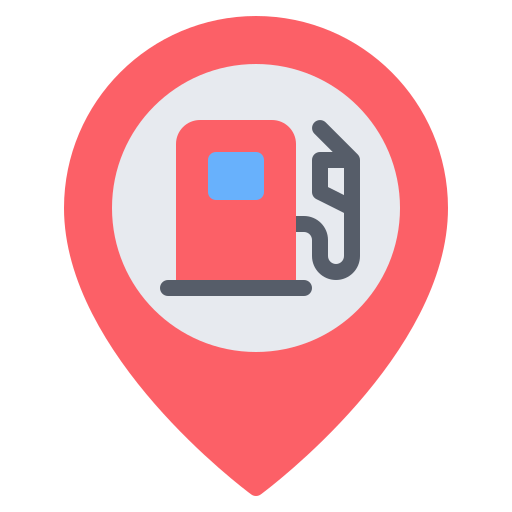
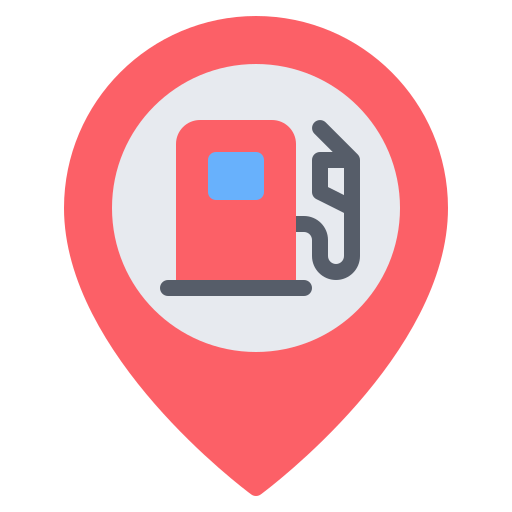
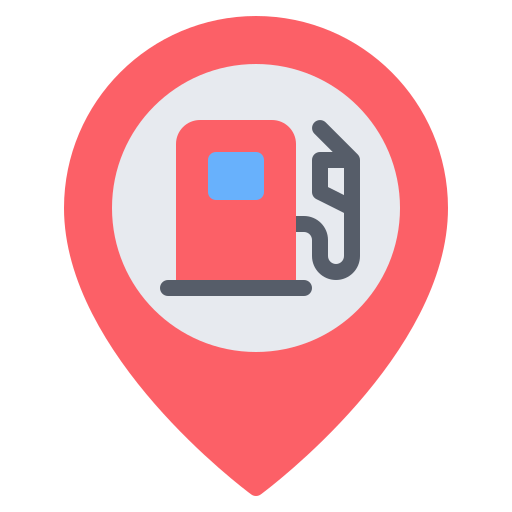
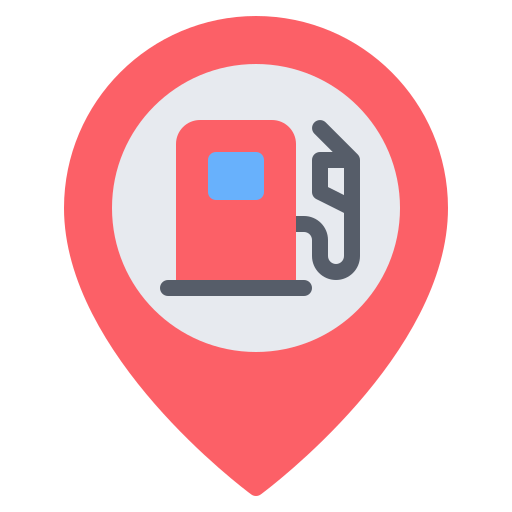
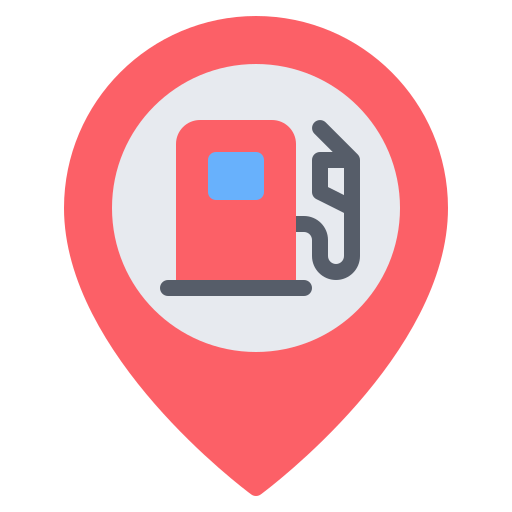
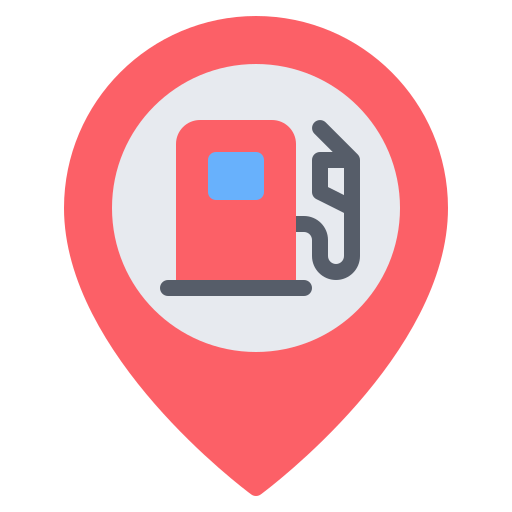
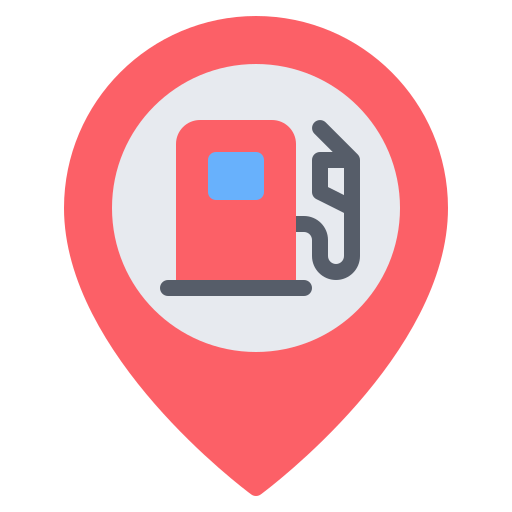
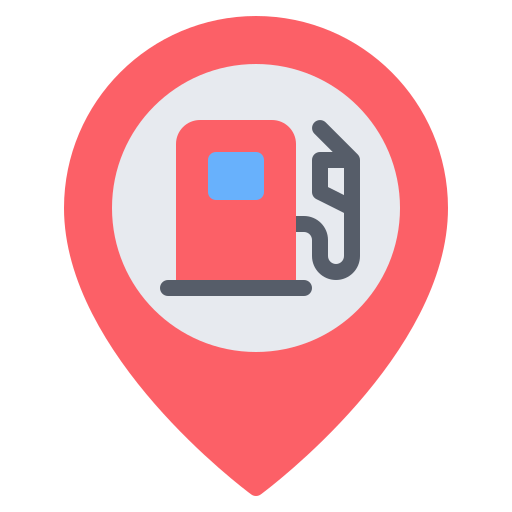
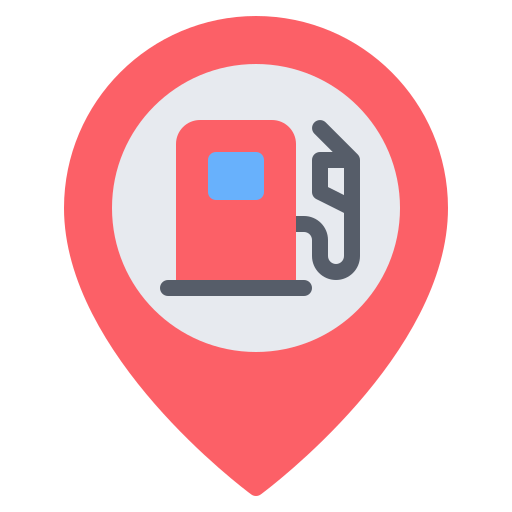
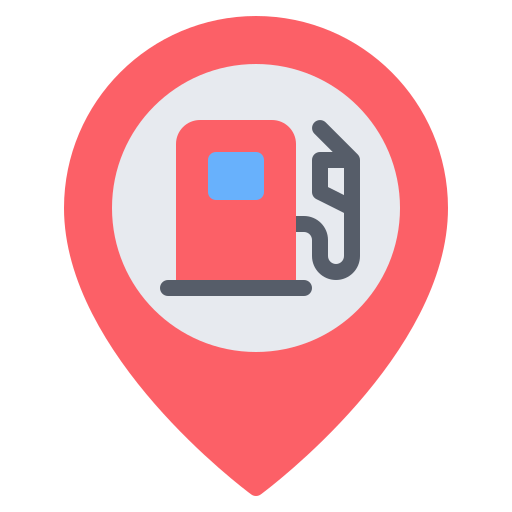
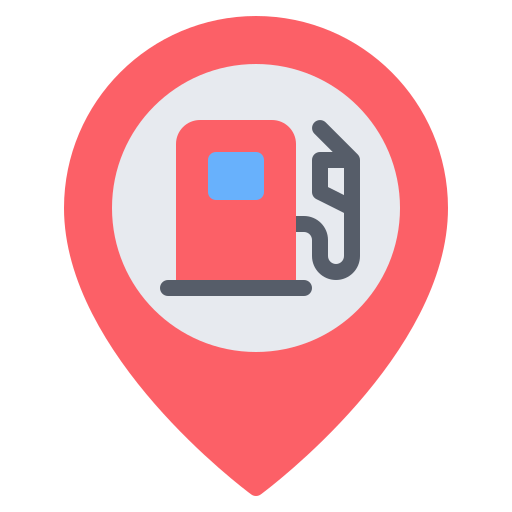
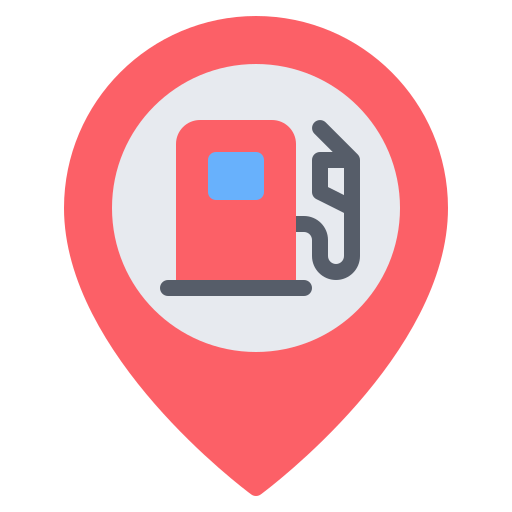
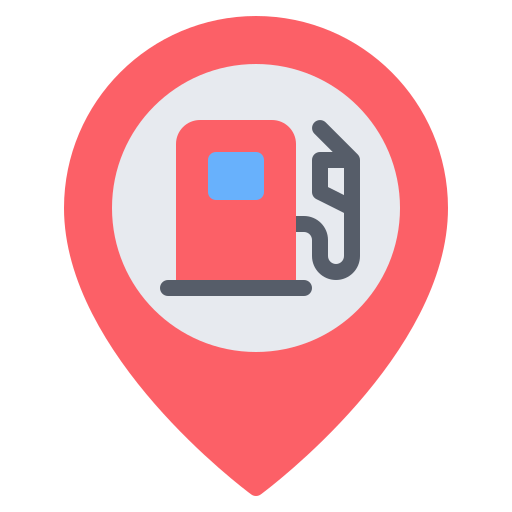
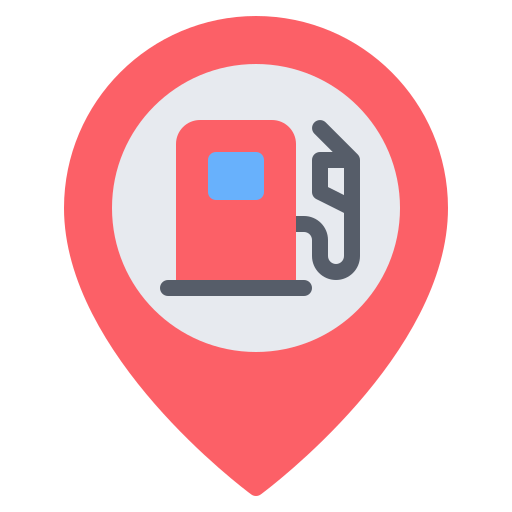
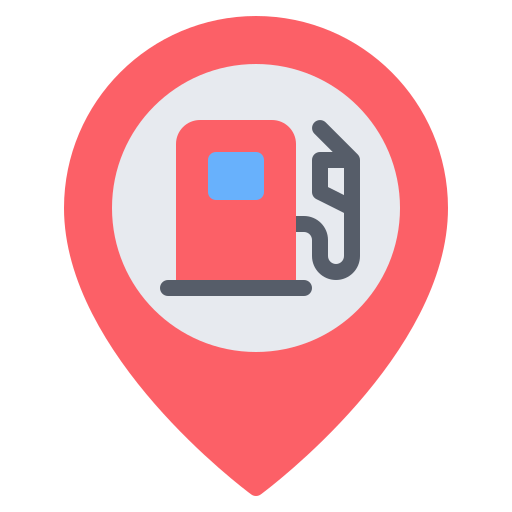
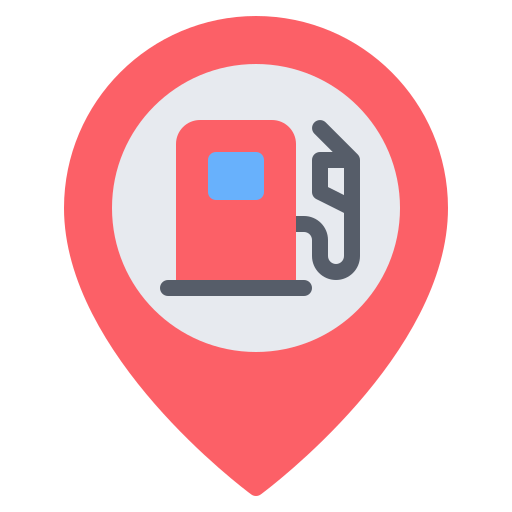
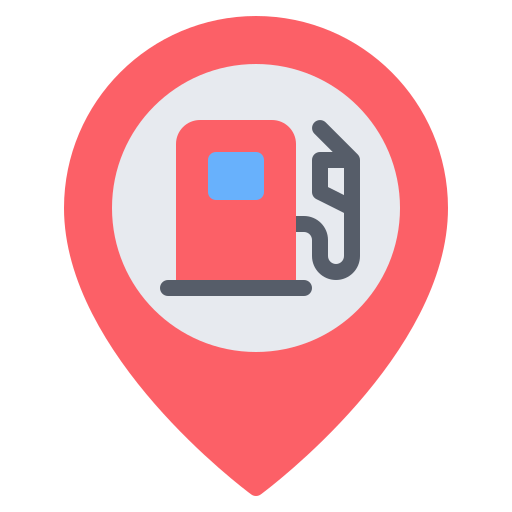
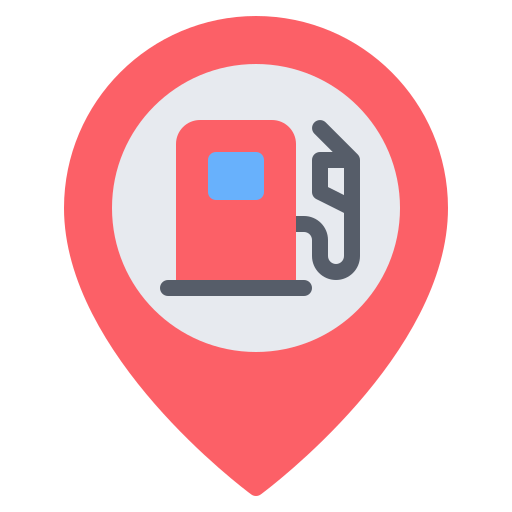
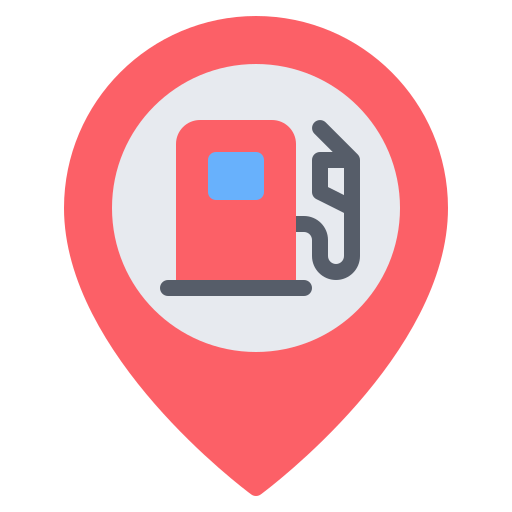
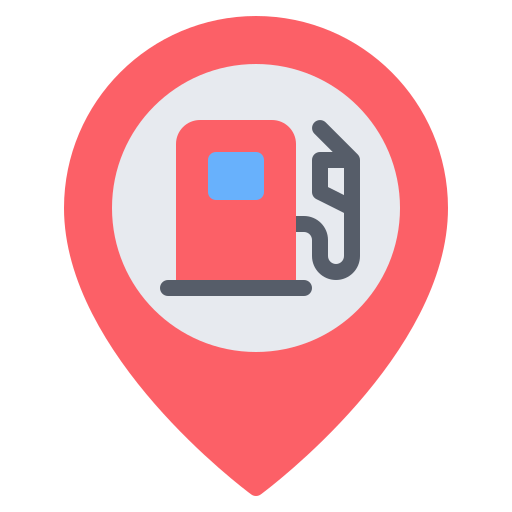
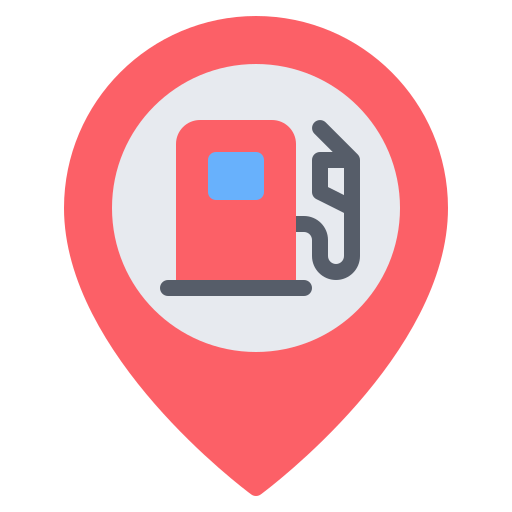
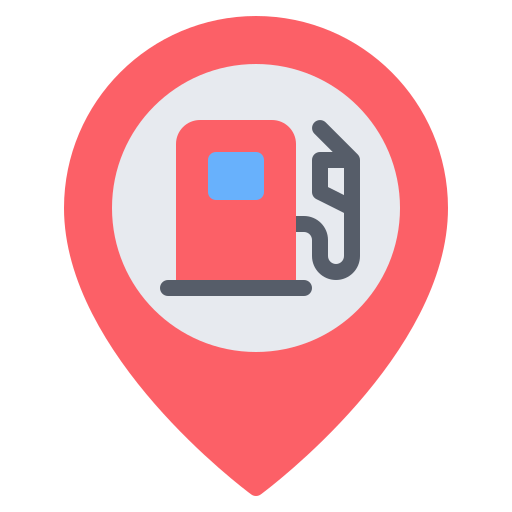
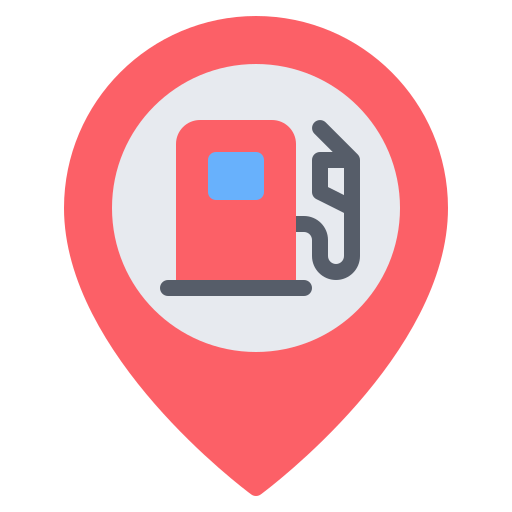
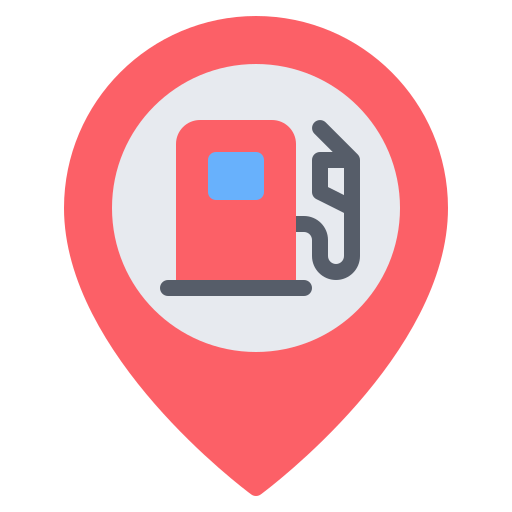
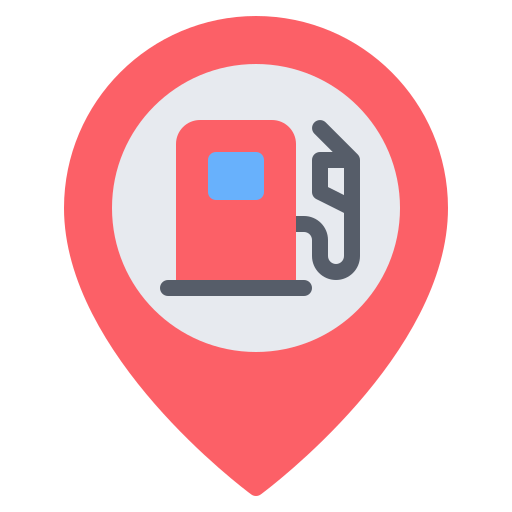
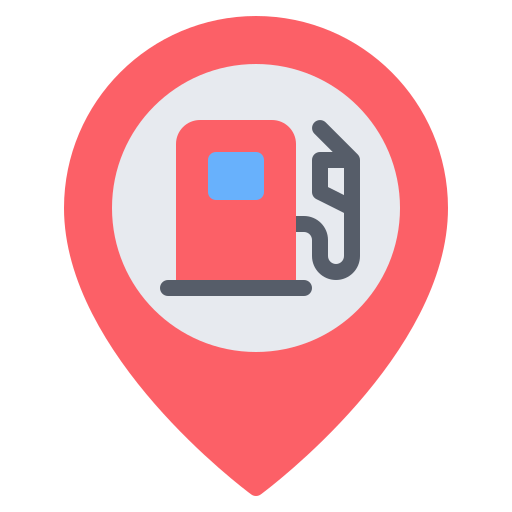
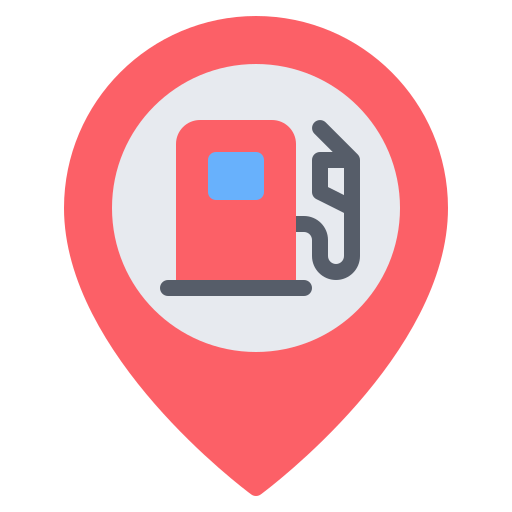
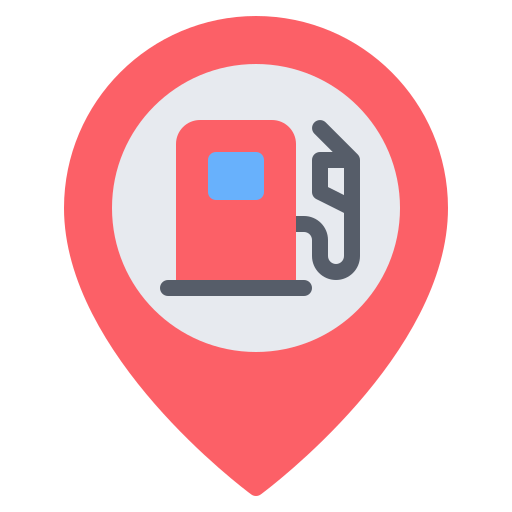
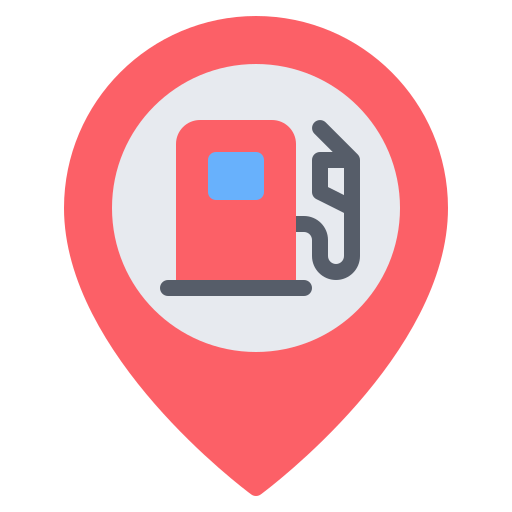
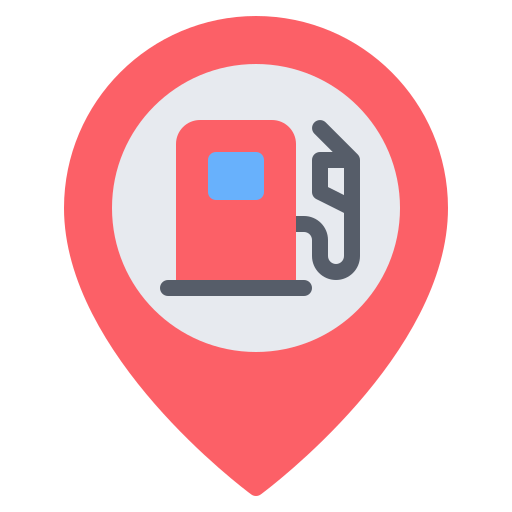
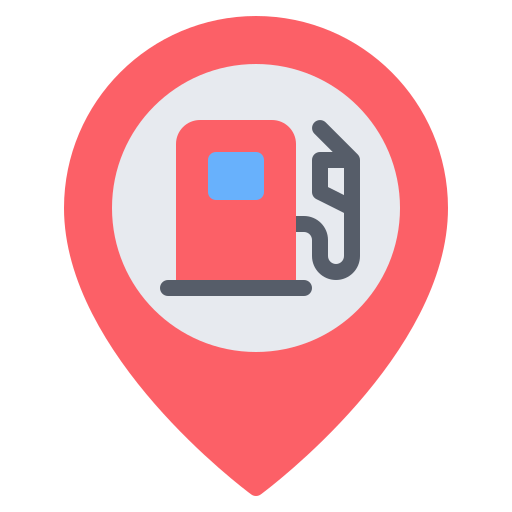
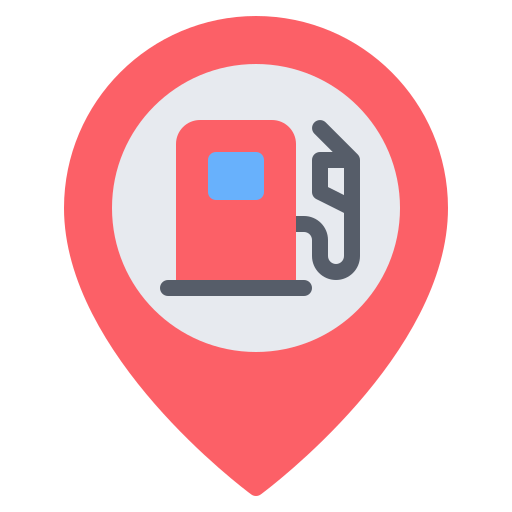
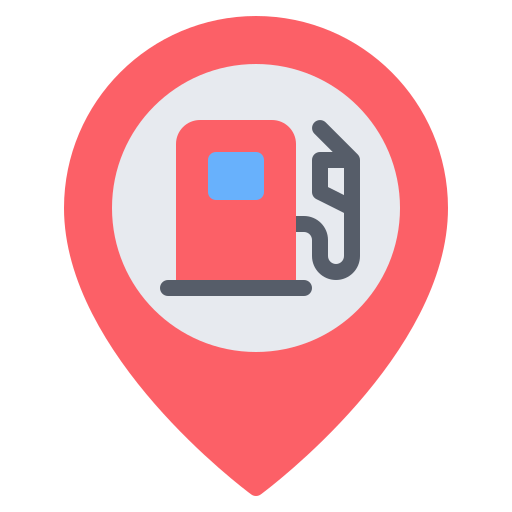
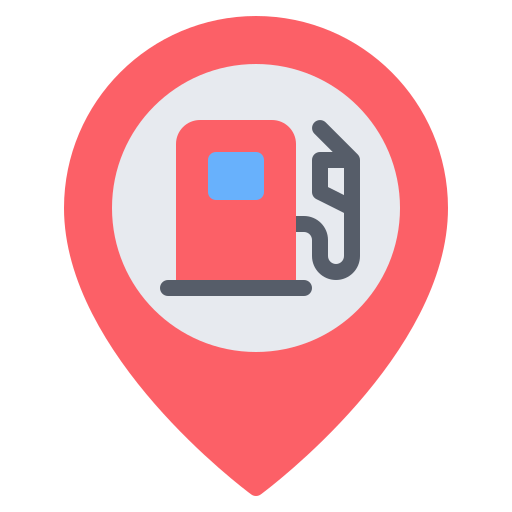
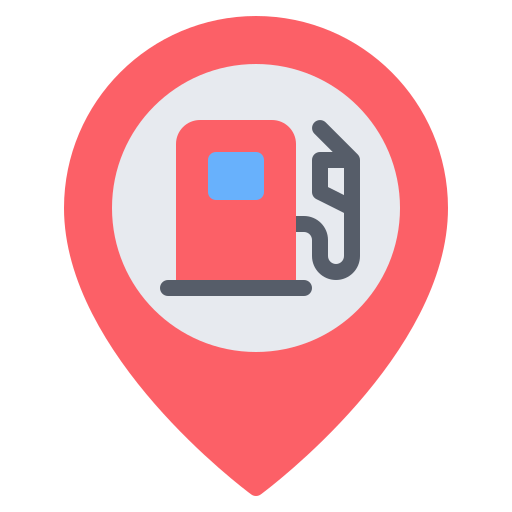
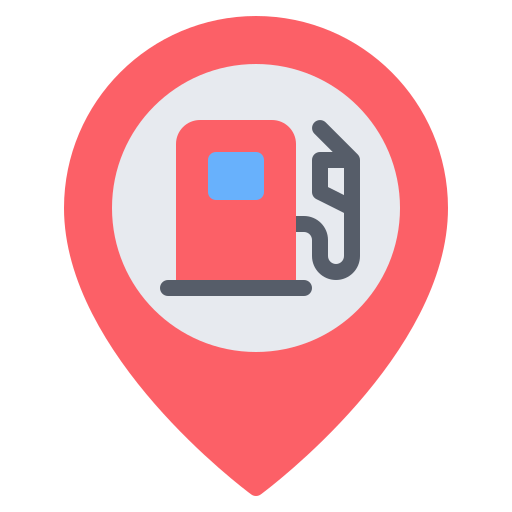
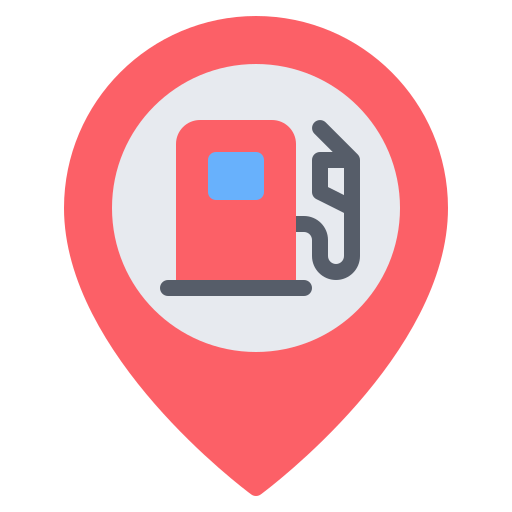
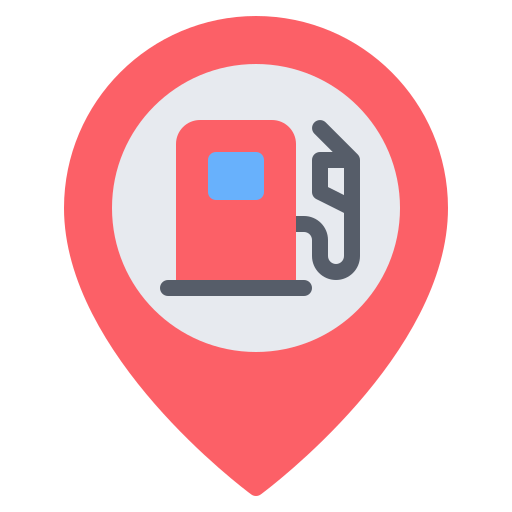
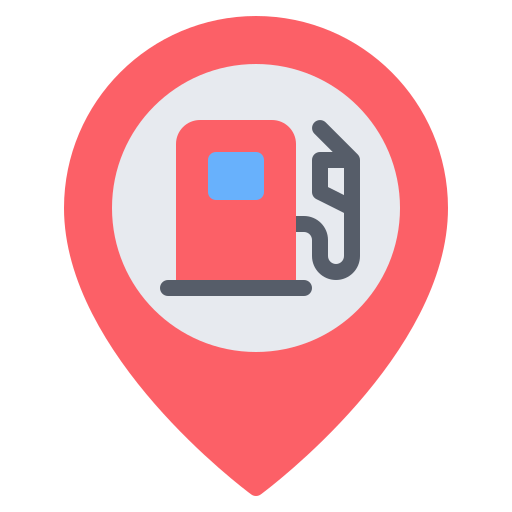
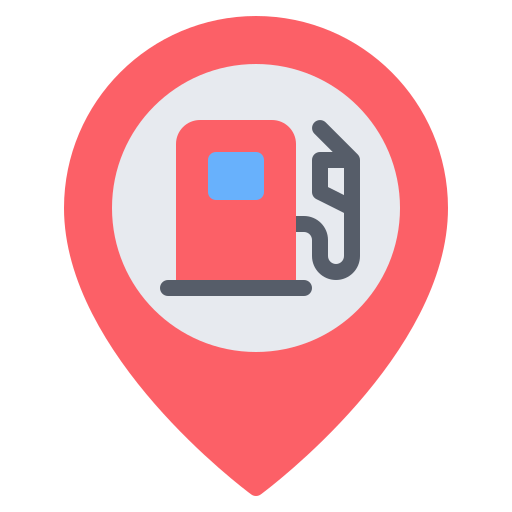
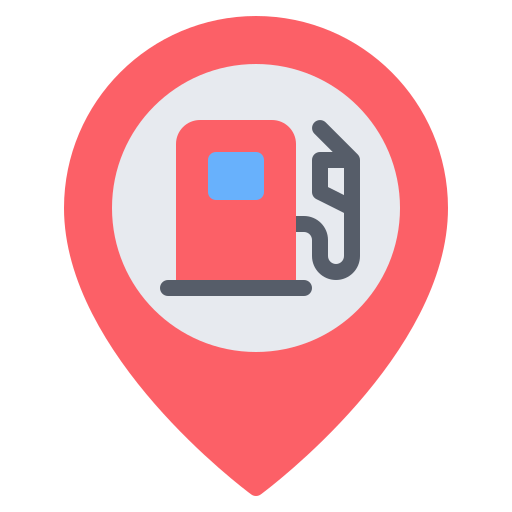
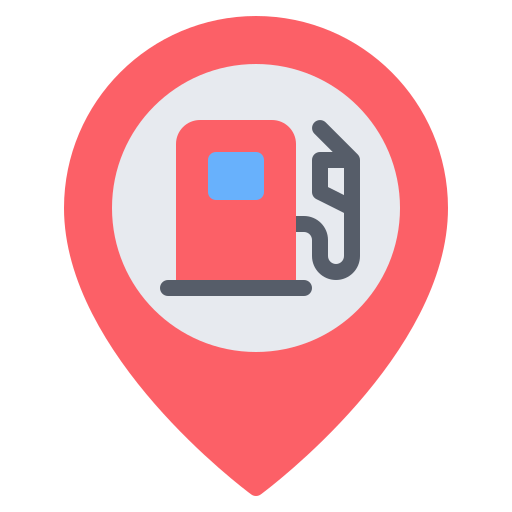
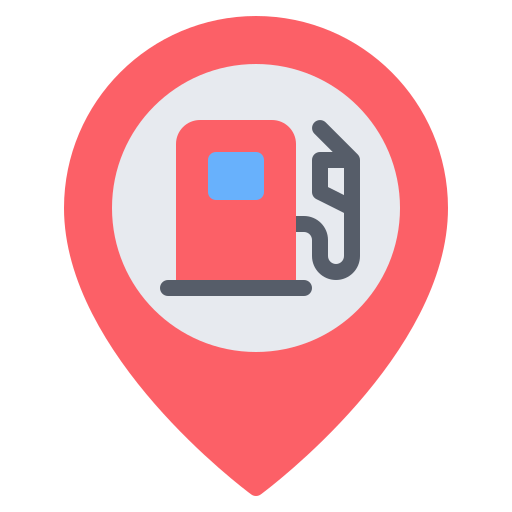
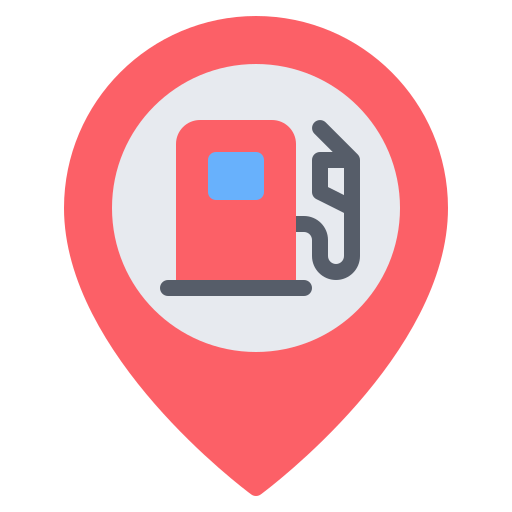
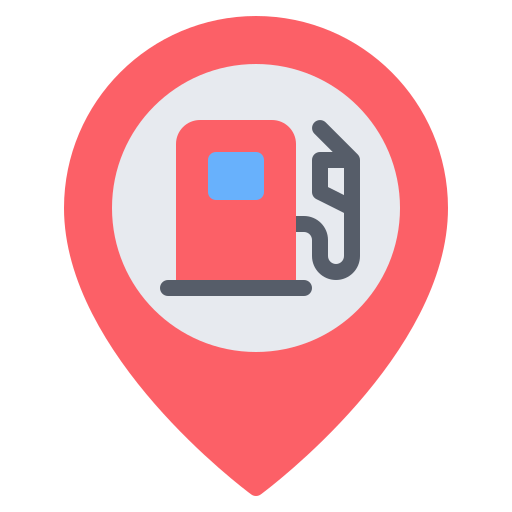
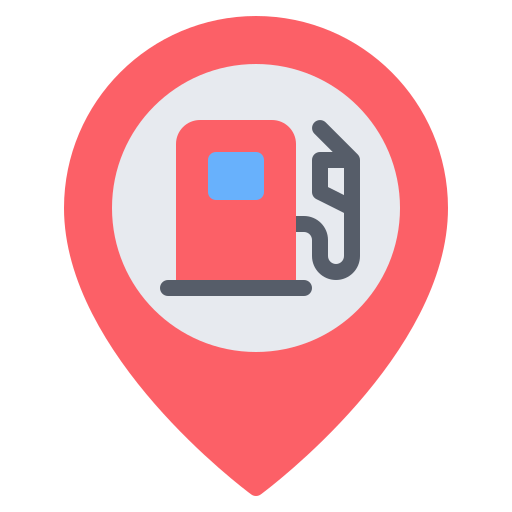
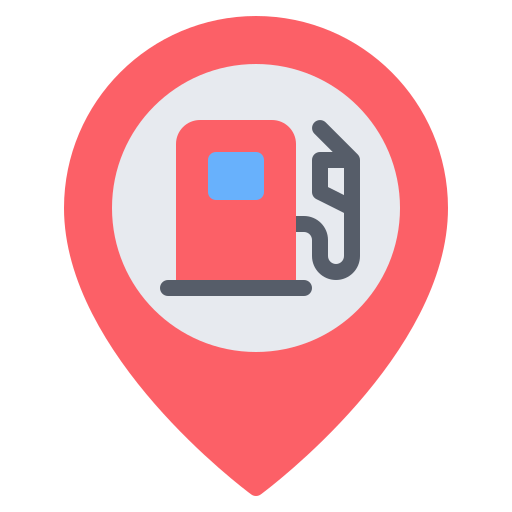
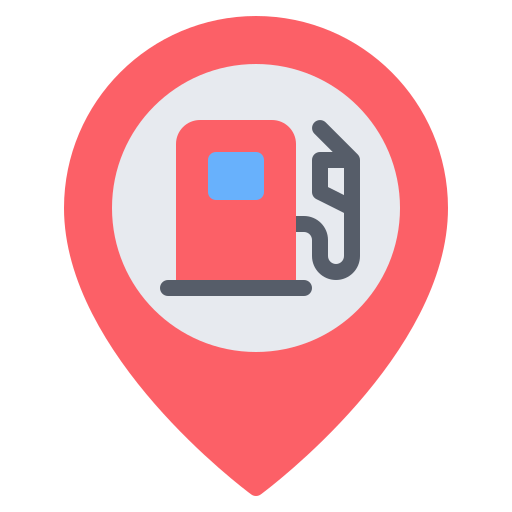
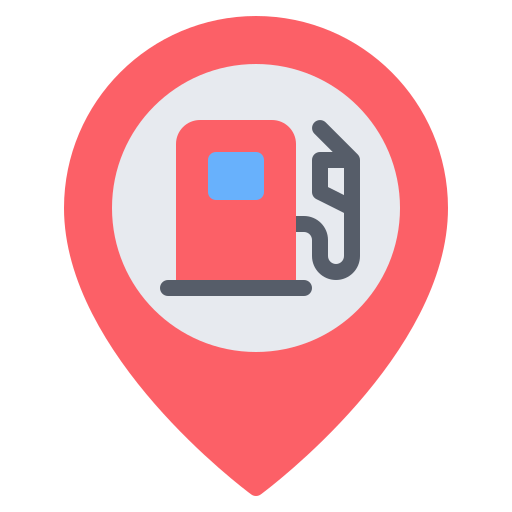
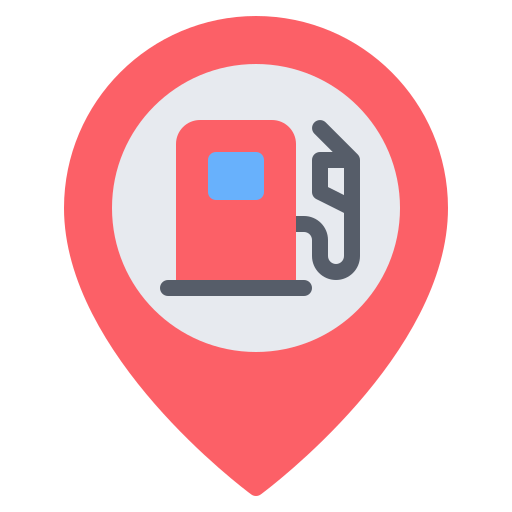
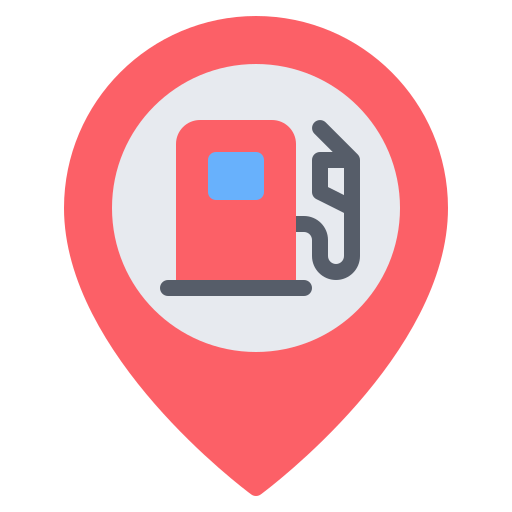
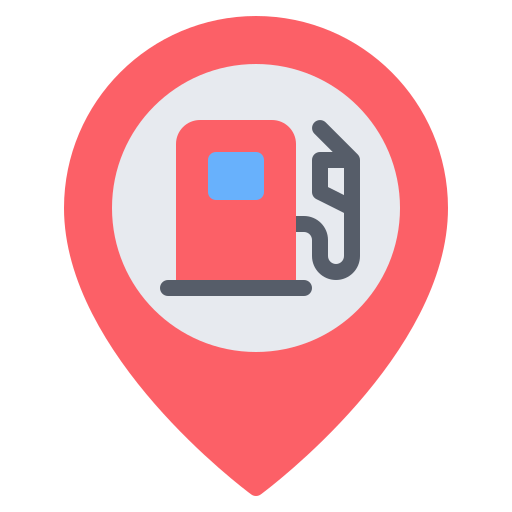
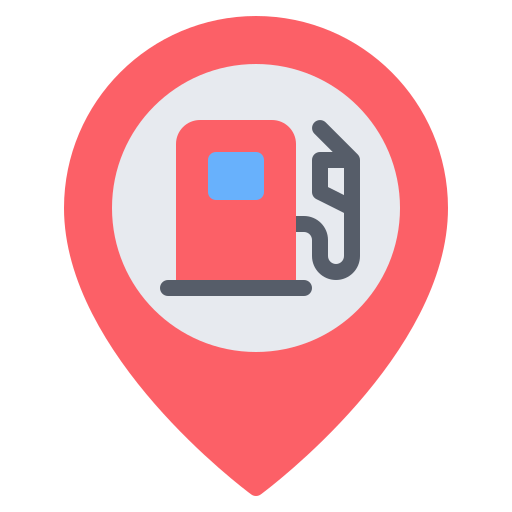
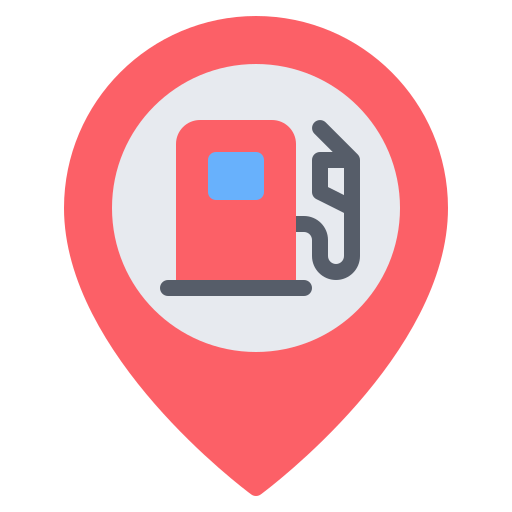
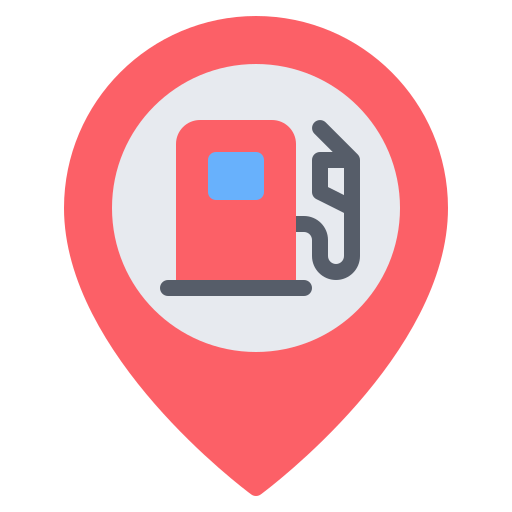
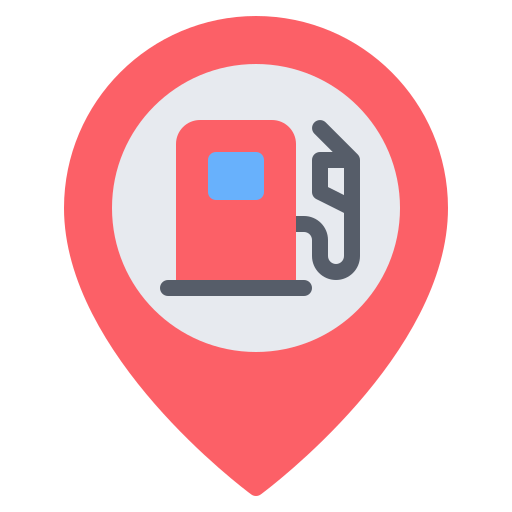
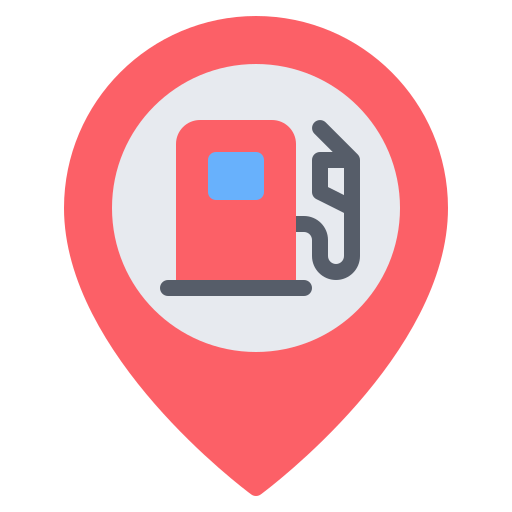
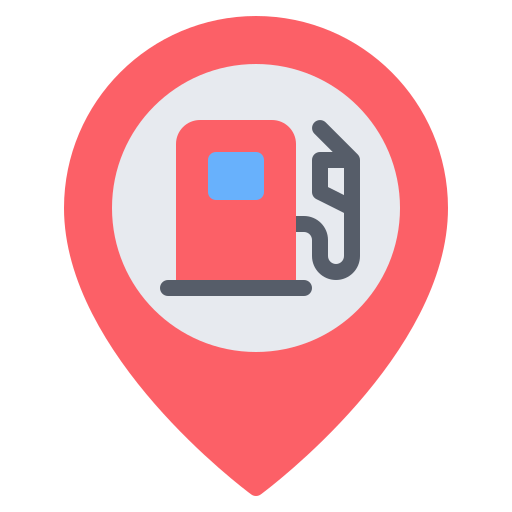
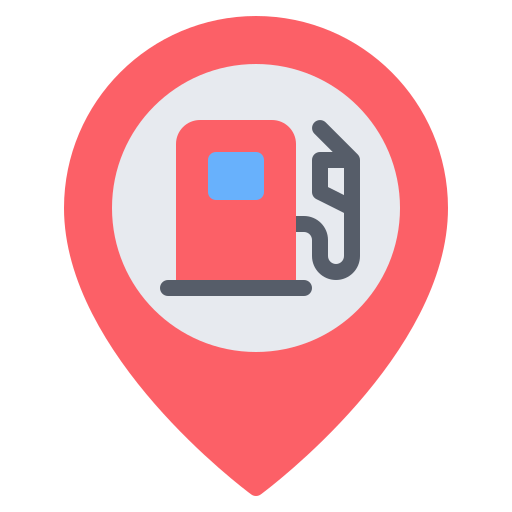
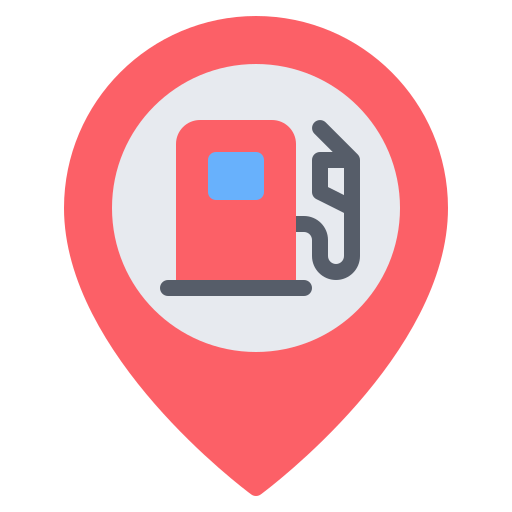
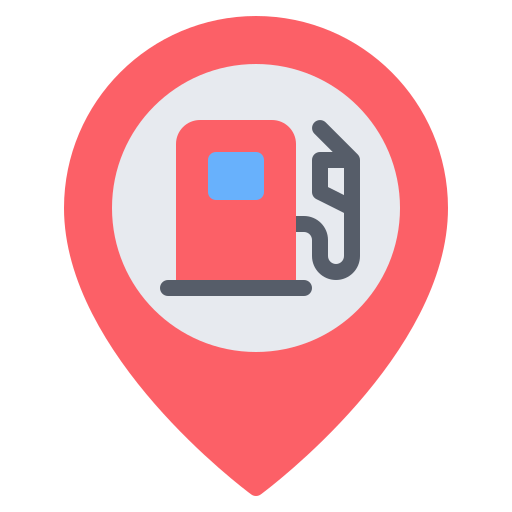
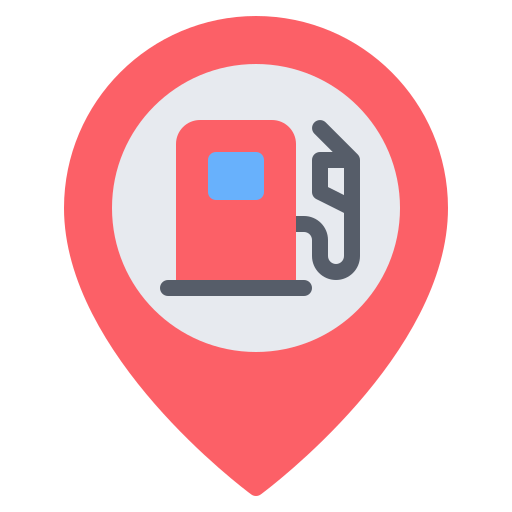
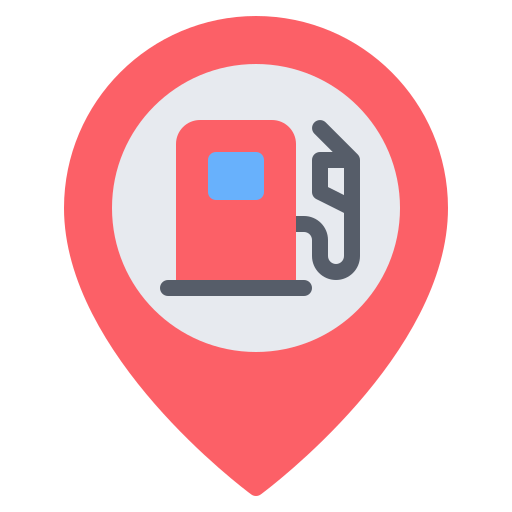
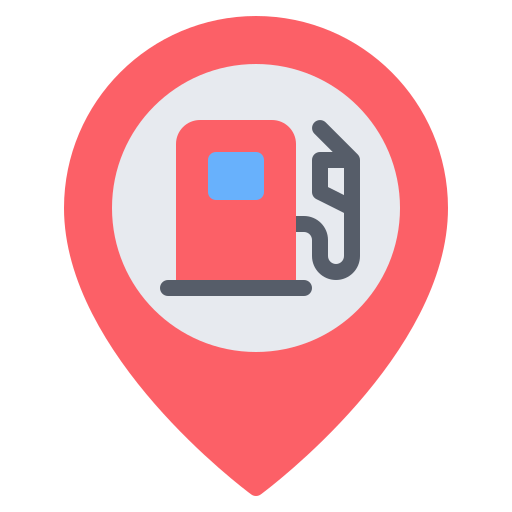
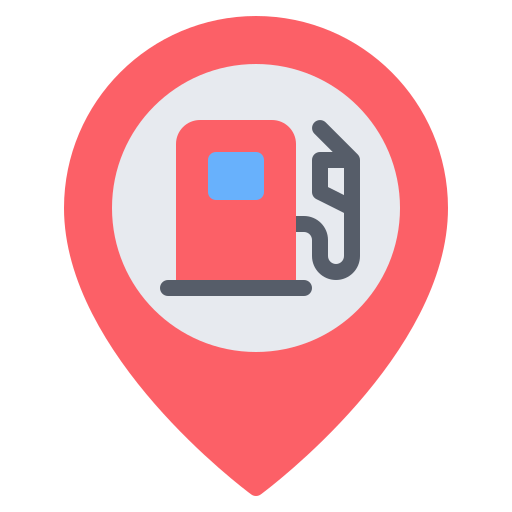
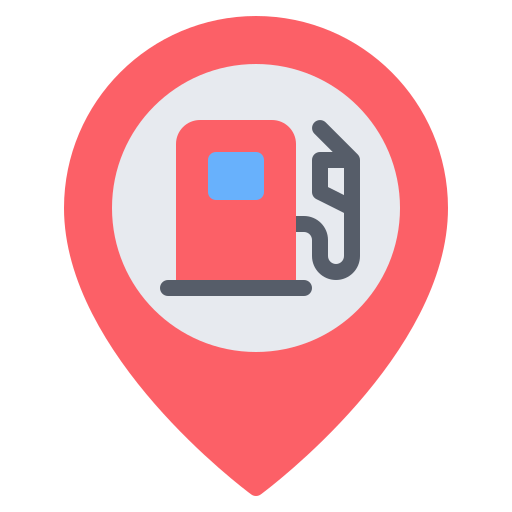
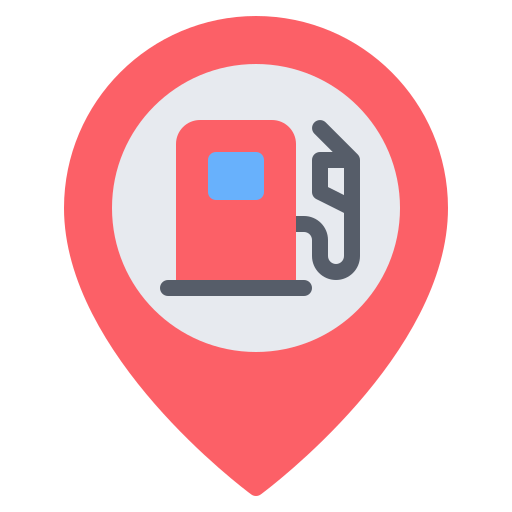
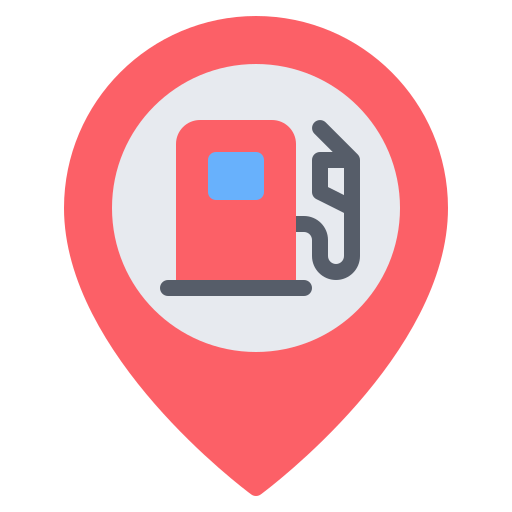
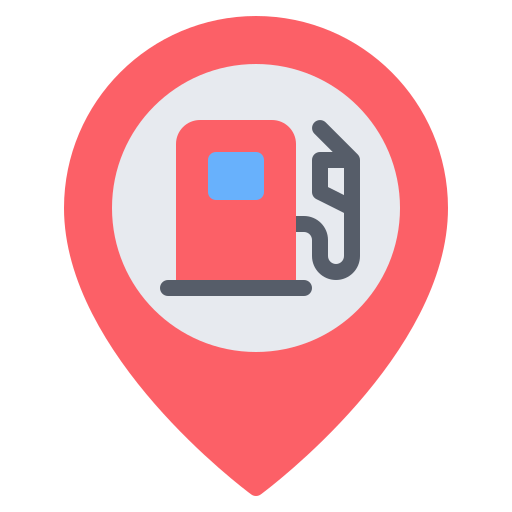
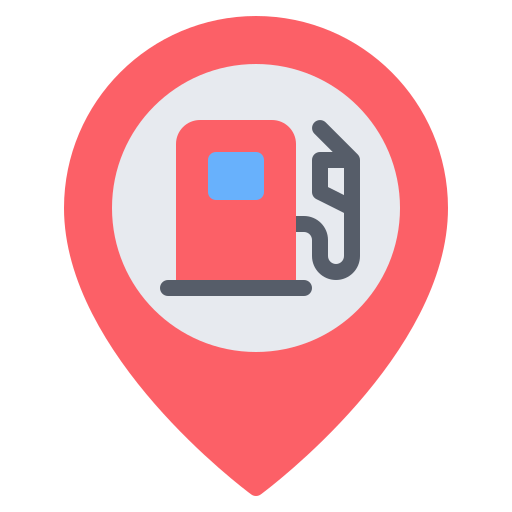
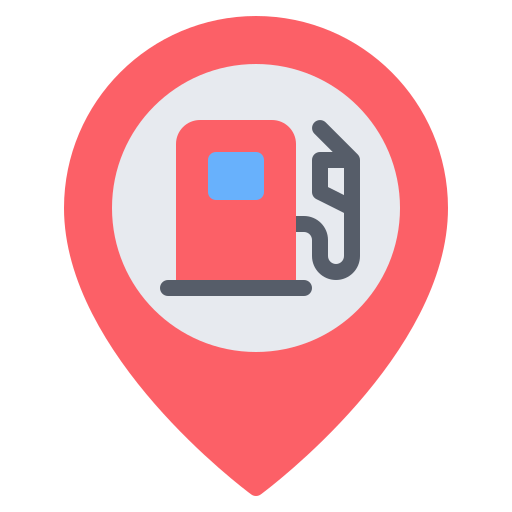
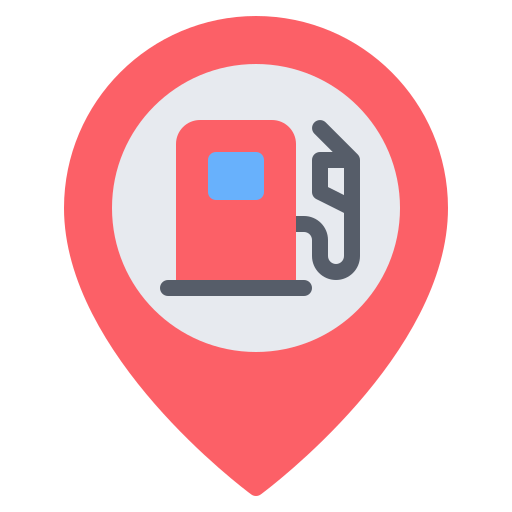
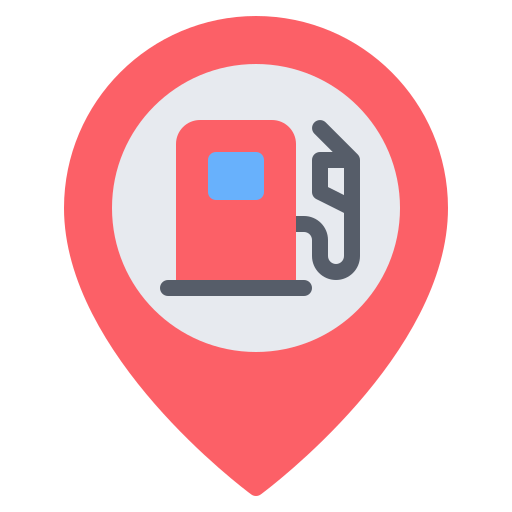
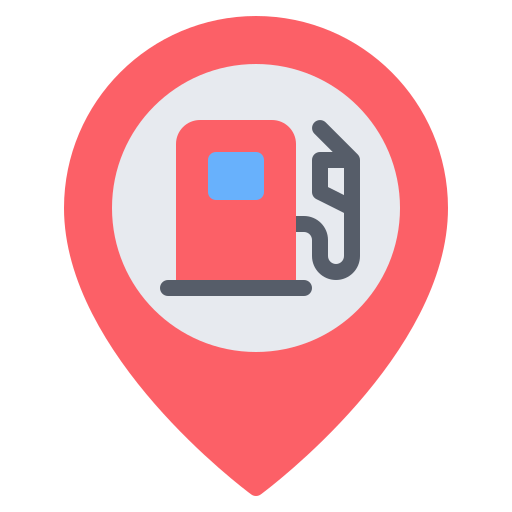
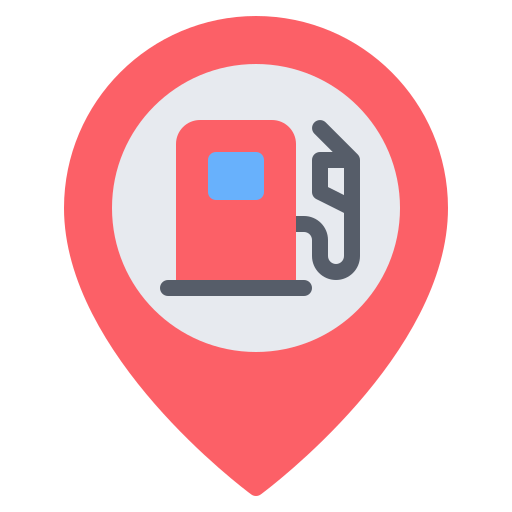
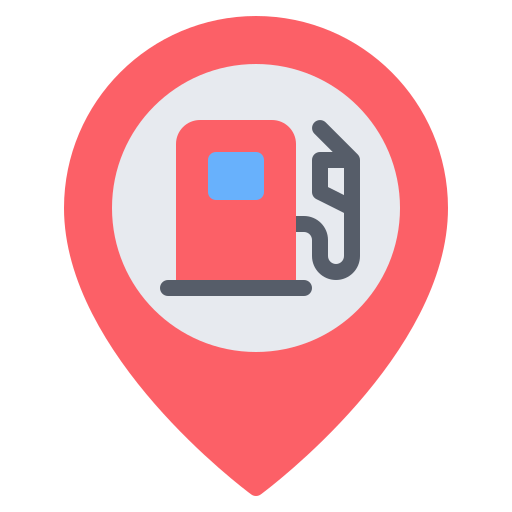
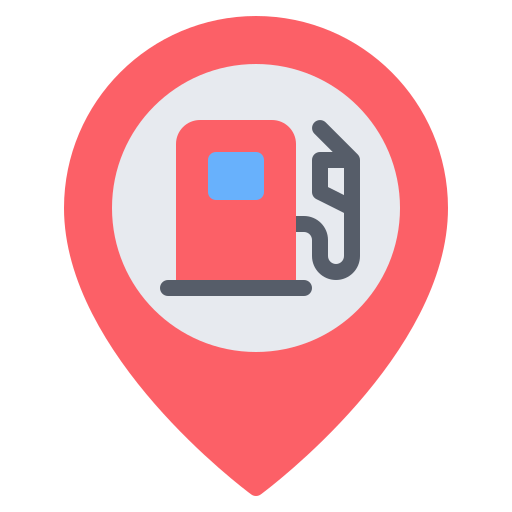
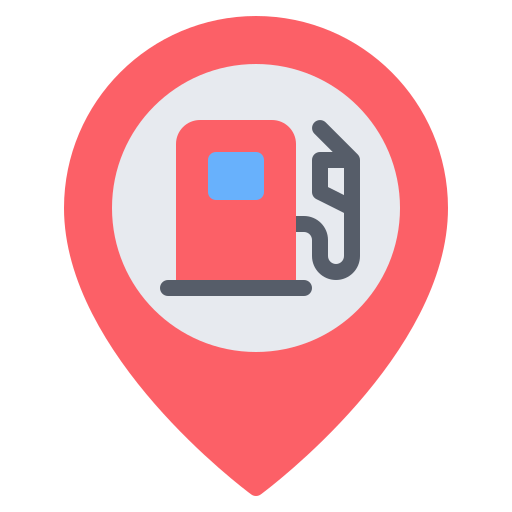
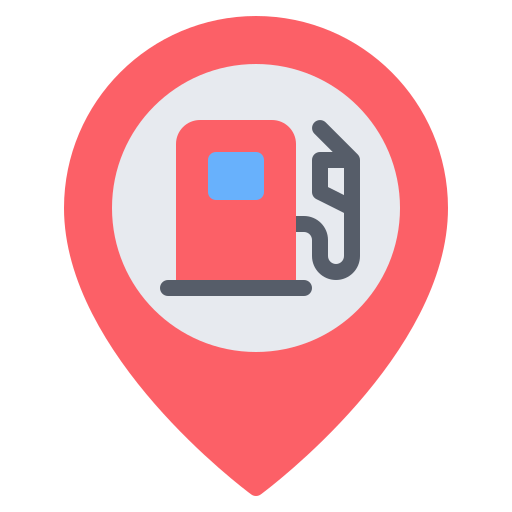
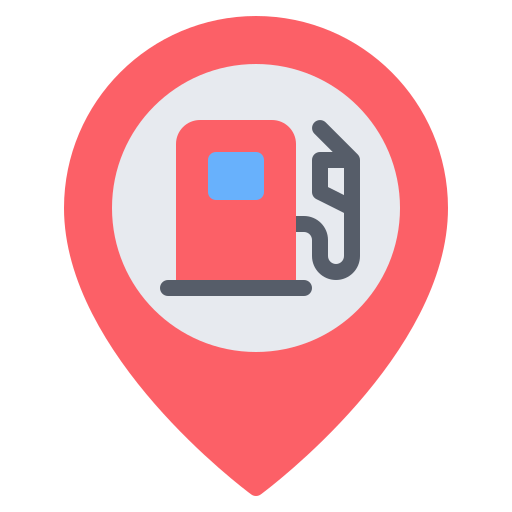
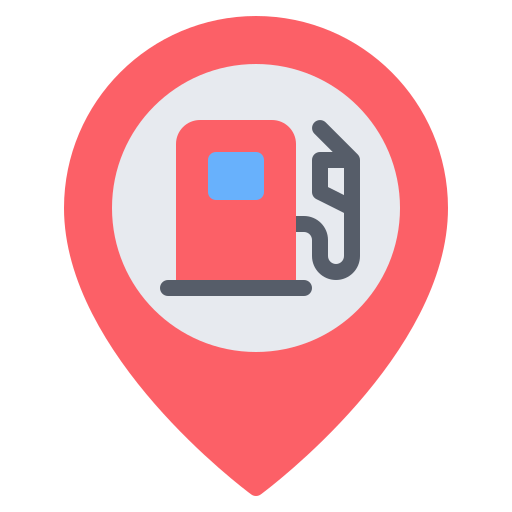
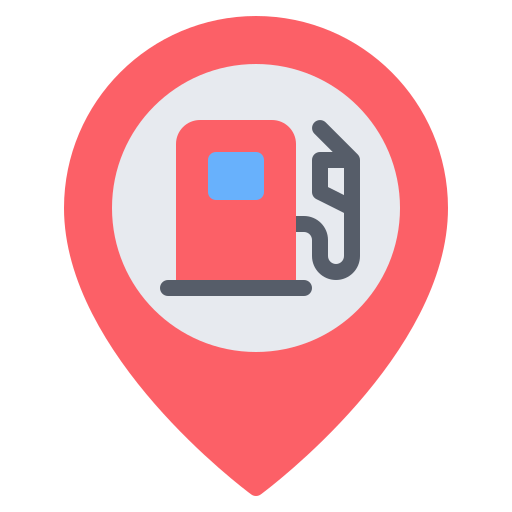
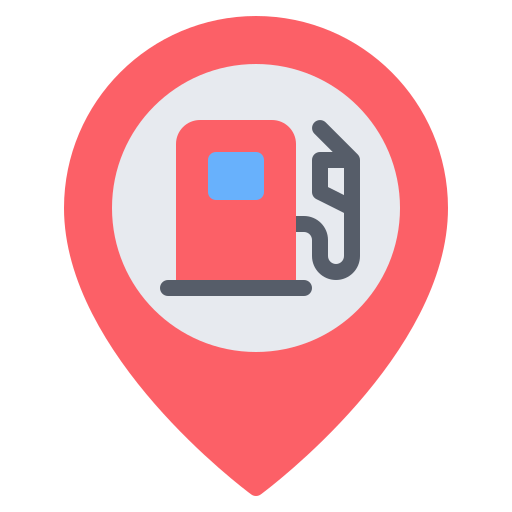
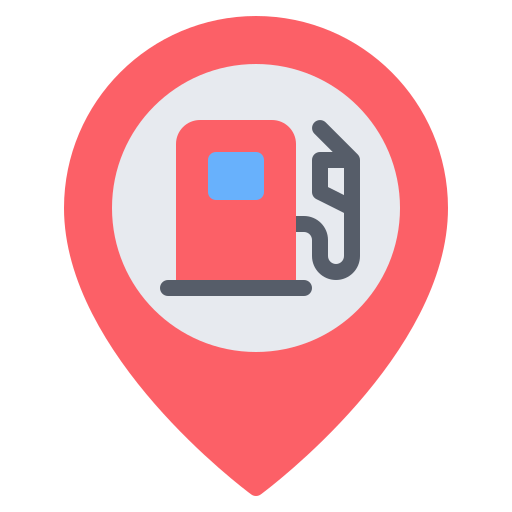
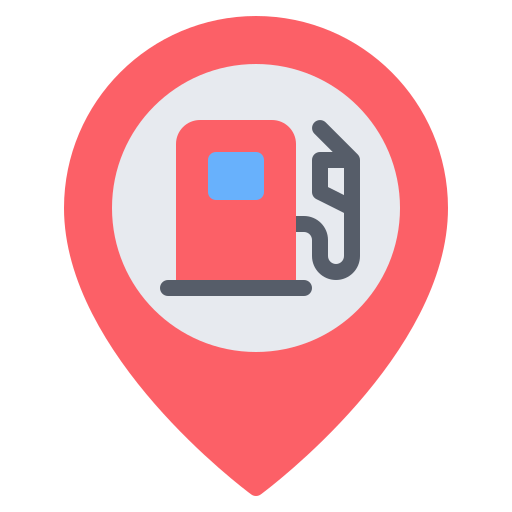
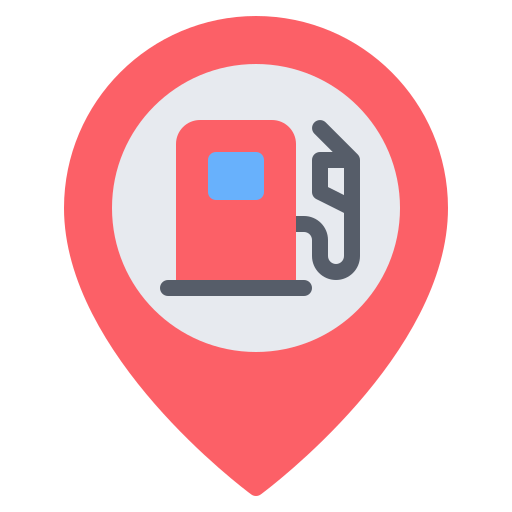
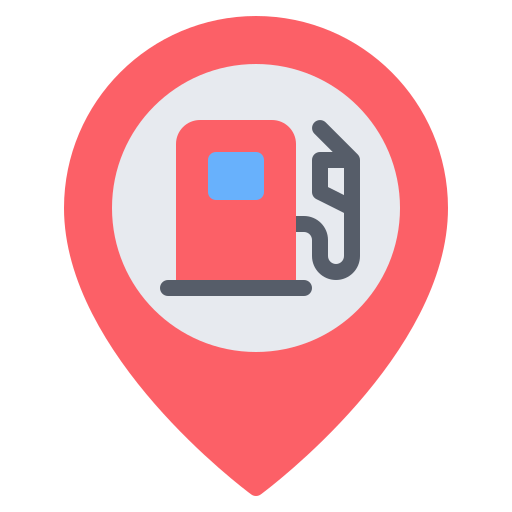
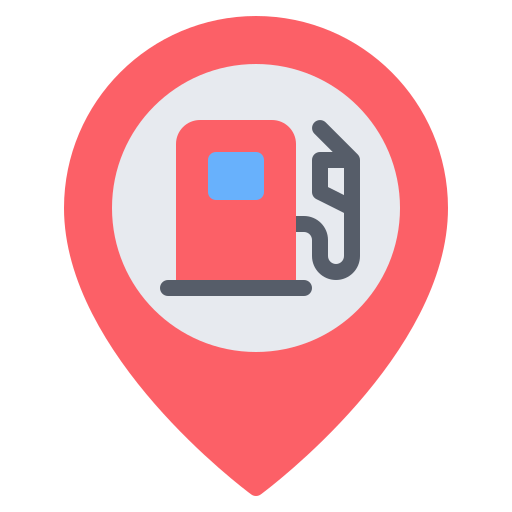
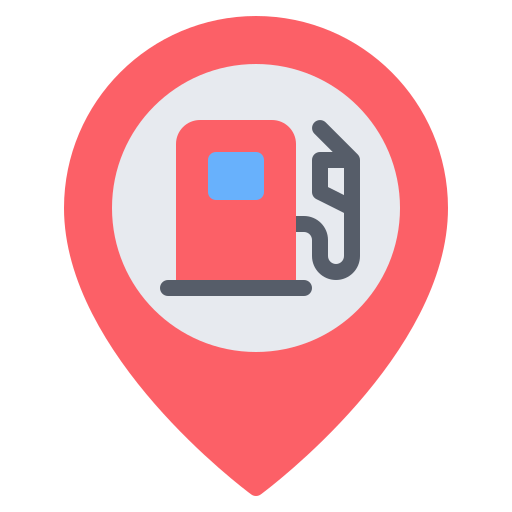
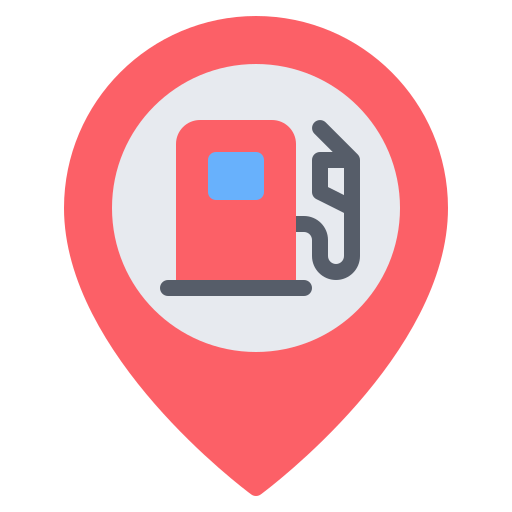
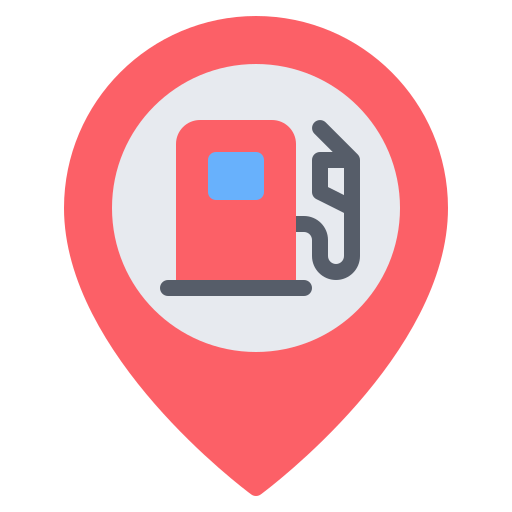
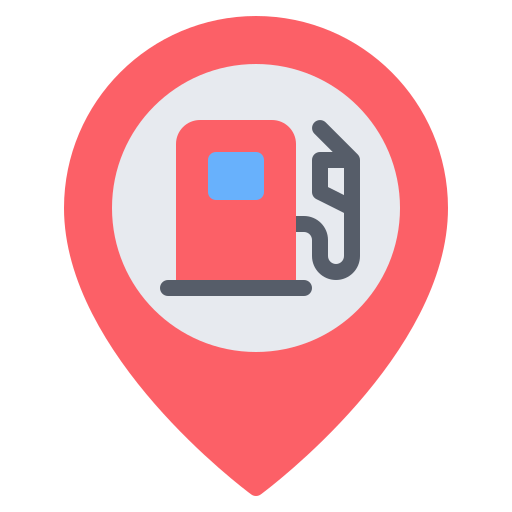
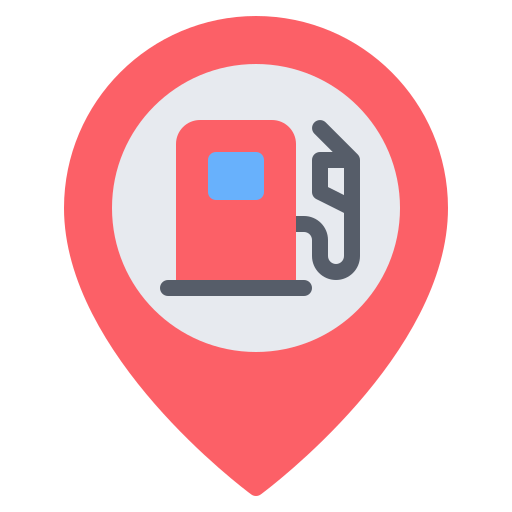
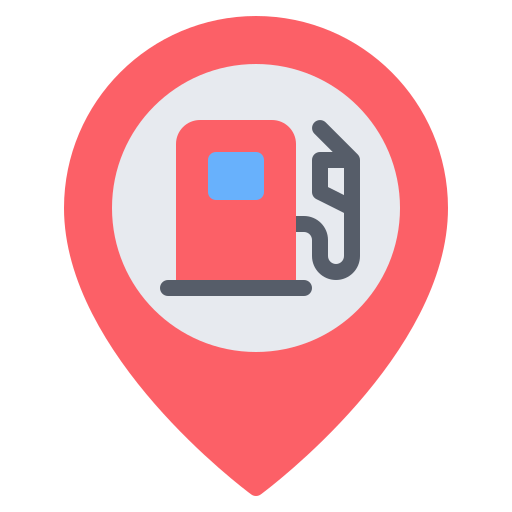
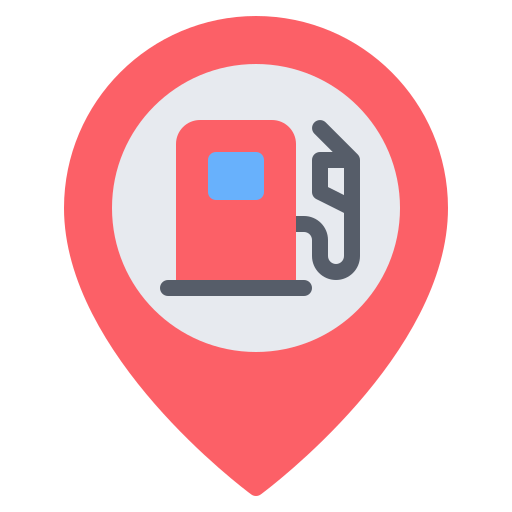
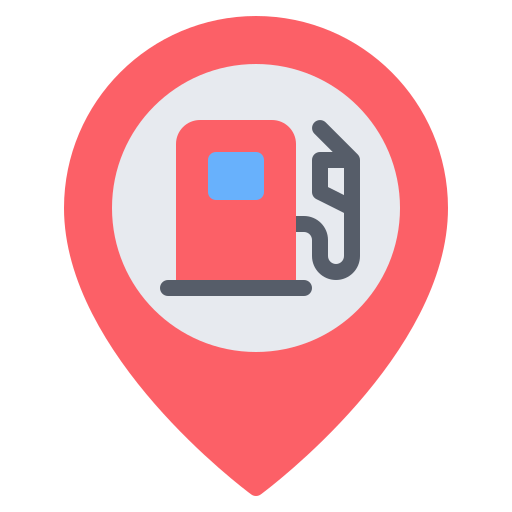
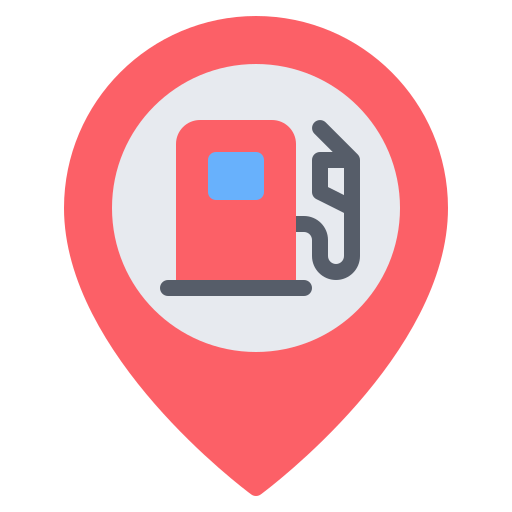
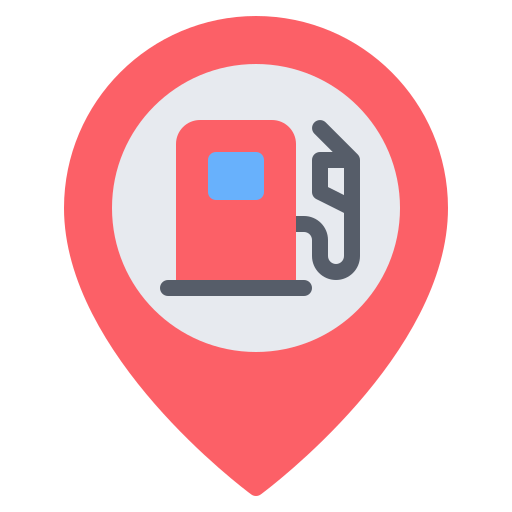
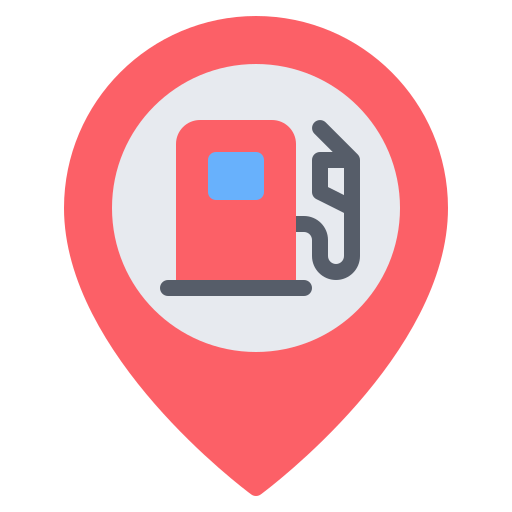
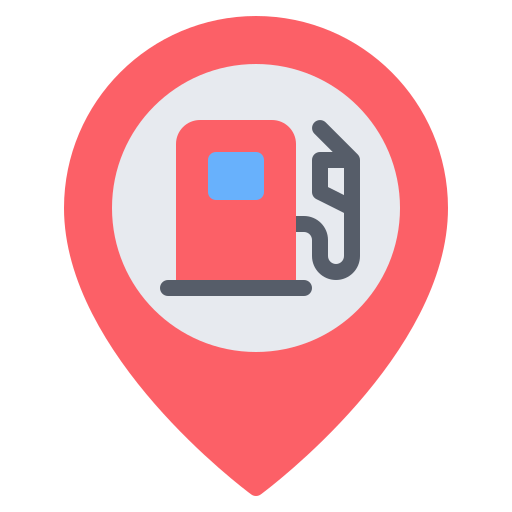
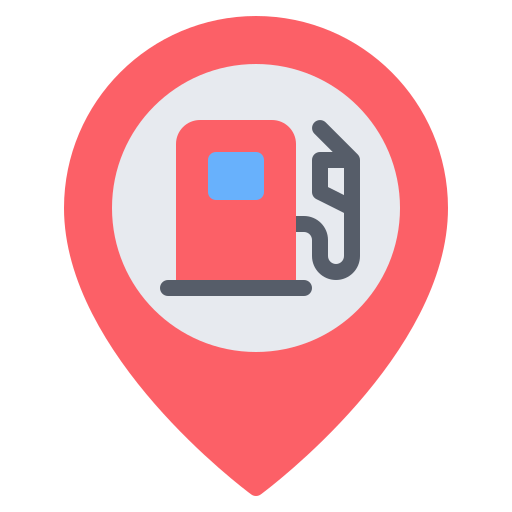
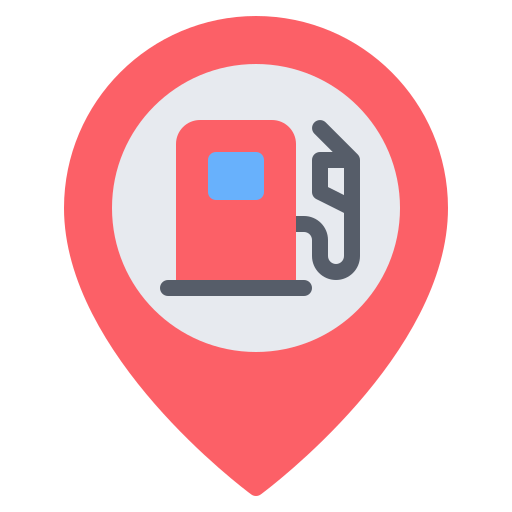
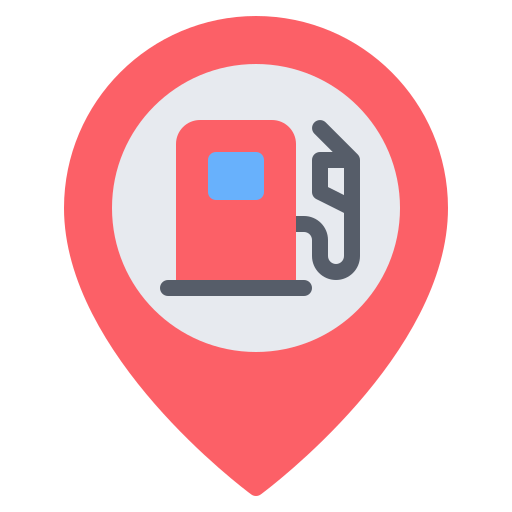
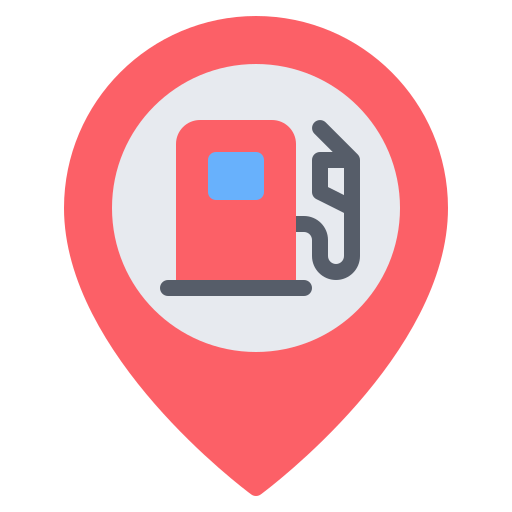
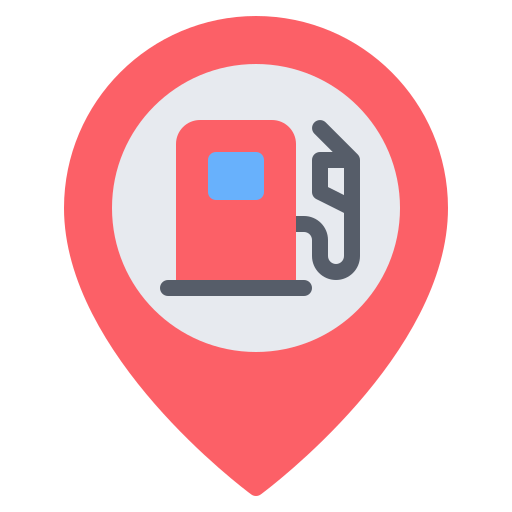

In [5]:
poly_m = folium.Map(location=[poi_lats[0], poi_longi[0]], zoom_start=13, scrollWheelZoom=False)

for i in range(len(poi_lats)):
    point = [poi_lats[i], poi_longi[i]]
    folium.Marker(point,
                  popup=point,
                  tooltip=point,
                  icon=folium.features.CustomIcon('assets/gas-station-marker.png', icon_size=(50, 50))
                  ).add_to(poly_m)

poly_m

In [6]:
qcentroid_api = Qcentroid_SDK(QCENTROID_PUBLIC_API, PAYLOAD_USER);

{'username': 'esa_test@qcentroid.xyz', 'password': '123qweQWE'}


In [7]:
header = qcentroid_api.login()

In [8]:
response_json = qcentroid_api.execute(header=header, problem='evplacement', payload=PAYLOAD)
print(response_json)

{'detail': 'Authorized. Processing file', 'job': '2DUB62APXIM0'}


In [16]:
result = qcentroid_api.get_result(header=header, job_name=response_json['job'])
job_id = response_json['job']

In [17]:
optimal_ev_chargers_locs = qcentroid_api.get_best_result(header, job_id)

In [18]:
optimal_ev_chargers_locs

[[37.762926, -122.435461],
 [37.780473, -122.484042],
 [37.77391, -122.437338],
 [37.773158, -122.445542],
 [37.764889, -122.417171],
 [37.762591, -122.434863],
 [37.748447, -122.416179],
 [37.744688, -122.476041],
 [37.780882, -122.471498],
 [37.742356, -122.486047]]

In [ ]:
ev_charger_lats = []
ev_charger_longi = []
for optimal_ev_chargers in optimal_ev_chargers_locs:
    ev_charger_lats.append(optimal_ev_chargers[0])
    ev_charger_longi.append(optimal_ev_chargers[1])

## Displaying the optimal locations of electric vehicle chargers on a map

In [ ]:
poly_m = folium.Map(location=[ev_charger_lats[0], ev_charger_longi[0]], zoom_start=13, scrollWheelZoom=False)

for i in range(len(ev_charger_lats)):
    point = [ev_charger_lats[i], ev_charger_longi[i]]
    folium.Marker(point,
                  popup=point,
                  tooltip=point,
                  icon=folium.features.CustomIcon('assets/ev-charger-transparent.png', icon_size=(50, 50))
                  ).add_to(poly_m)

poly_m